### ΔΕΥΤΕΡΗ ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ ΑΝΑΓΝΩΡΙΣΗΣ ΠΡΟΤΥΠΩΝ :Αναγνώριση φωνής με Κρυφά Μαρκοβιανά Μοντέλα και Αναδρομικά Νευρωνικά Δίκτυα

Ομάδα : 

Πολλάτος Βασίλης (03115011)

Κοντογιάννης Αντρέας (3115187)


### Βήμα 1
Με χρήση του εργαλείου Praat, έγινε ανάγνωση των δύο αρχείων της εκφώνησης και δημιουργήθηκαν δυο αντικείμενα. Στην συνέχεια, με την επιλογή της εντολής "Draw" σχεδιάστηκαν οι κυμματομορφές αυτών και πήραμε τις παρακάτω μετρήσεις:



**Ομιλητής 1 -- man**   
- Φωνήεν "α"  
$$mean pitch = 134.75896368564133 Hz  $$
$$first formant = 760.4818395491948 Hz  $$
$$second formant = 1263.1400799992578 Hz  $$
$$third formant = 2430.325551787484 Hz  $$
- Φωνήεν "ου"   
$$mean pitch = 128.3605181592144 Hz  $$
$$first formant = 341.70446637941427 Hz  $$
$$second formant = 1788.2115327728227 Hz  $$
$$third formant = 2371.6325650612966 Hz  $$
- Φωνήεν "ι"  
$$mean pitch = 130.22016834198575 Hz  $$
$$first formant = 384.3599313837045 Hz  $$
$$second formant = 1853.2763783637058 Hz  $$
$$third formant = 2256.0501831505403 Hz  $$   




**Ομιλητής 8 -- woman**   
- Φωνήεν "α"  
$$meanpitch = 176.2211486013052 Hz  $$
$$first formant = 920.960856523734 Hz  $$
$$second formant = 1767.41551440897  Hz  $$
$$third formant = 3097.064417352753  Hz  $$
- Φωνήεν "ου"   
$$mean pitch = 184.13629438421847  Hz  $$
$$first formant = 358.54904275203234  Hz  $$
$$second formant = 1842.3225707076085  Hz  $$
$$third formant = 2679.964413469807 Hz  $$
- Φωνήεν "ι"  
$$mean pitch = 175.54195847376502 Hz  $$
$$first formant = 346.0913149182412 Hz  $$
$$second formant = 1923.8674468610895 Hz  $$
$$third formant = 2614.787675113574 Hz    $$

Παρατηρήσεις
Για το pitch μπορούμε να πούμε ότι διαφέρει αρκετά για τον άνδρα και την γυναίκα, παρόλο που για δοσμένο το φυλό του εκφωνητή δεν διαφέρει τόσο ανά φωνήεν. Πιο αναλυτικά, στον ανδρά είναι κοντά στα 130Hz, ενώ στην γυναίκα στα 180Hz. Από την άλλη, τα formants συμμετέχουν πιο ενεργά στην διαφοροποίηση των φωνηέντων, και άρα, και των ψηφίων. Πιο συγκεκριμένα, παρατηρούμε πως το "α" έχει και στα δυο φύλα τα υψηλότερα first και third formants, με αποτέλεσμα να καθίσταται εύκολη η αναγνώρισή του. Για τα "ου" και "ι" μπορούμε να πούμε πως είναι πιο δύσκολη η αναγνώρισή τους, καθώς τα formants τους έχουν παρόμοιες τιμές. Ωστόσο κάποιο είναι μεγαλύτερο για το ένα και κάποιο για το άλλο, με αποτέλεσμα να καθίσταται μάλλον πιο εύκολη η αναγνώρισή του ψηφίου από συνδυασμό της γνώσης των formants τους.

### Βήμα 2

Φορτώνουμε τα αρχεία με τις εκφωνήσεις των ψηφίων.

In [112]:
!pip install --user librosa
!pip install --user sklearn
!pip install --user torch

In [113]:
%matplotlib inline

In [114]:
import librosa
import warnings

def dataparser(folder_path):
    # Loads .wav files from folder folder_path/
    digits = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]
    wav = []
    speaker_list = []
    digit_list = []
    for digit in digits:
        for speaker in range(1,16):
            try:
                temp_wav = librosa.load(folder_path + digit + str(speaker) + ".wav", sr=16000)
            except:
                continue
            wav.append(temp_wav)
            speaker_list.append(speaker)
            digit_list.append(digit)
    
    return wav, speaker_list, digit_list

In [115]:
wav, speaker, digit = dataparser("./data/digits/")

/home/bill/.local/lib/python3.5/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/bill/.local/lib/python3.5/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


### Βήμα 3
Κάνουμε ανάγνωση των ηχητικών αρχείων (X_data) και τα συνδέουμε με τα labels τους (Y_data) που είναι το εκάστοτε ψηφίο που εκφωνήθηκε. Τα ψηφία ανήκουν στο σύνολο {1, 2, .. 9}. Το σύνολο X_data με την ένταση των σημάτων στο χρόνο δεν βολεύει για το σκοπό του learning στη μορφή που είναι. Αυτό που θα χρησιμοποιηθεί ως X_data θα είναι ένα σύνολο χαρακτηριστικών που θα εξαχθεί από το σήμα. Στο σημείο αυτό αρκούμαστε στους 13 πρώτους συντελεστές mfccs (mel frequency cpectral coefficients). Το ceptrum περιέχει πληροφορίες για τους ρυθμούς μεταβολής στα διάφορα κανάλια του spectrum. Το mel frequency είναι ο μετασχηματισμός των συχνοτήτων σε λογαριθμική κλίμακα, η οποία είναι πιο κοντά στον τρόπο με τον οποίο αντιλαμβάνεται ο άνθρωπος τις αρμονικές ήχου (ψυχοακουστικό μοντέλο). Για κάθε συντελεστή παίρνουμε επίσης ως χαρακτηριστικό την πρώτη και τη δεύτερη τοπική παράγωγο (deltas, delta-deltas). Έτσι καταλήγουμε σε 39 χαρακτηριστικά (για κάθε παράθυρο της ανάλυσης).

In [116]:
import os
import librosa
import re
import numpy as np

sample_rate=16000

def dataparser(path='data/digits/'):
    
    digits = {"one":1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, "eight":8, "nine":9}
    mylist= os.listdir(path)
    wav = []
    speaker_list = []
    digit_list = []

    for filename in mylist:        
        speaker_list.append(re.sub(r'[^0-9 ]','', filename[0:len(filename)-4]))
        digit_list.append(digits[re.sub(r'[^a-z ]','', filename[0:len(filename)-4])])
        X, sample_rate = librosa.load('data/digits/'+filename, sr=16000)
        wav.append(X)
        sample_rate = np.array(sample_rate)
#         print(sample_rate)
#         mfccs = librosa.feature.mfcc(y=X, sr=16000, n_mfcc=40)
    
    return wav, speaker_list, digit_list

window_width = 0.025
hop = 0.01
wav, speaker_list, digit_list = dataparser()



    
mfccs=[]
mfscs=[]
mfcc_deltas=[]
mfcc_delta2s=[]


for w in wav:
    mfcc_tmp=librosa.feature.mfcc(y=w, sr=16000, n_mfcc=13, hop_length=int(sample_rate*hop), win_length=int(sample_rate*window_width))
    mfsc_tmp = librosa.feature.melspectrogram(y=w, sr=16000, hop_length=int(sample_rate*hop), win_length=int(sample_rate*window_width))[0:13]
    mfccs.append(mfcc_tmp)
    mfscs.append(mfsc_tmp)
    mfcc_deltas.append(librosa.feature.delta(mfcc_tmp))
    mfcc_delta2s.append(librosa.feature.delta(mfcc_tmp, order=2))
 
    



### ΒΗΜΑ 4

Στο σημείο αυτό κάνουμε παρατηρήσεις πάνω στους συντελεστές mfccs. Θέλουμε να δούμε πως μεταβάλλονται για συγκεριμένο ψηφίο από εκφώνηση σε εκφώνηση. Δοκιμάζουμε συνδυαστικά δυο ψηφία και δυο συντελεστές και φτιάχνουμε ιστογράμματα για τις τιμές των συντελεστών. Κάθε ιστόγραμμα τις συχνότητες εμφάνισης τιμών ενός συντελεστή για μια εκφώνηση πάνω σε όλα τα παράθυρα της εκφώνησης. Παρατηρούμε ότι οι αντίστοιχοι συντελεστές σε διαφορετικές εκφνωνήσεις του ίδιου ψηφίου έχουν παρόμοια κατανομή τιμών. Παίρνουν τιμές στο ίδιο εύρος και οπι συχνότητες εμφάνισης μοιάζουν. Οι μεγαλύτερες συχνότητες  εμφάνισης εντοπίζονται στις ακραίες τιμές των συντελέστών (μέγιστα κι ελάχιστα bins). Οι κατανομές διαφορετικών συντελεστών βρίσκονται σε διαφορετικά διαστήματα (-700 -300), (75 250) για τους 2 πρώτους αντίστοιχα. Τα διαστήματα αυτά διατηρούνται σχετικά αμετάβλημα ακόμα και από ψηφίο σε ψηφίο για τον ίδιο συντελεστή. 



<class 'numpy.ndarray'>


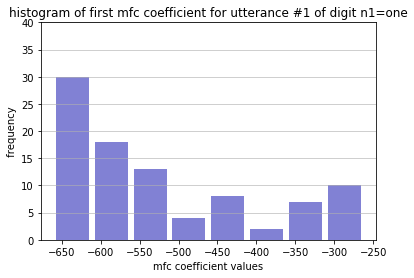

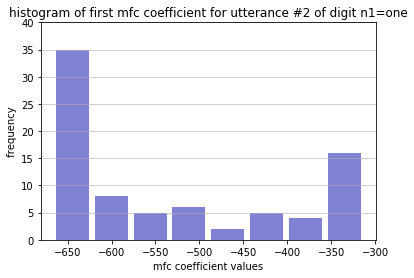

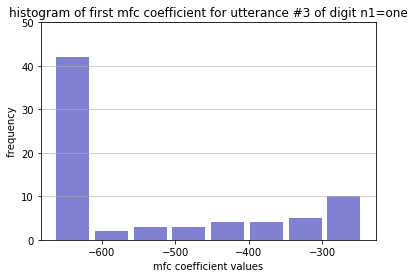

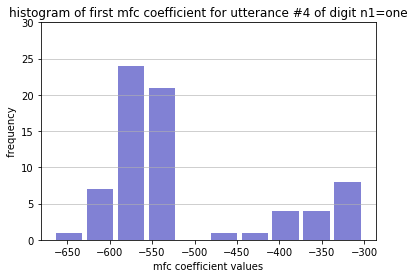

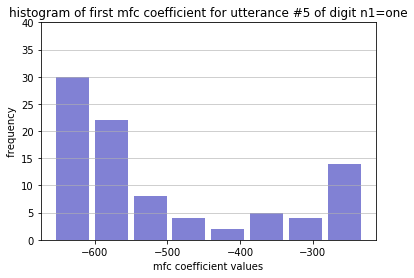

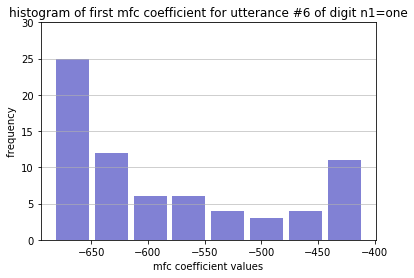

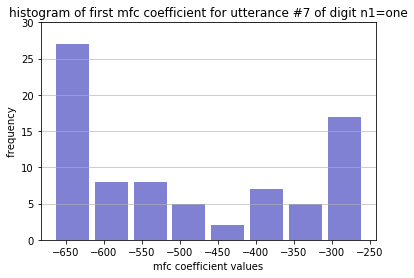

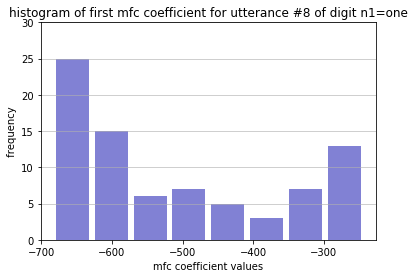

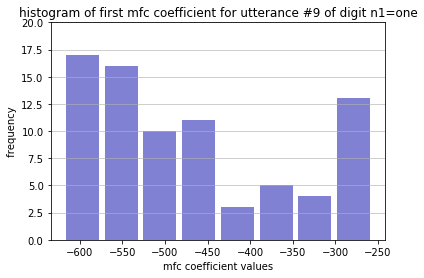

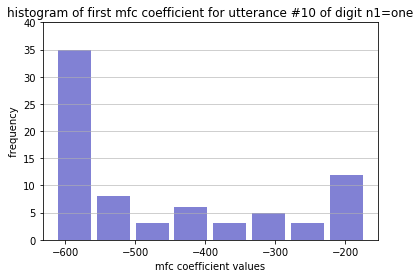

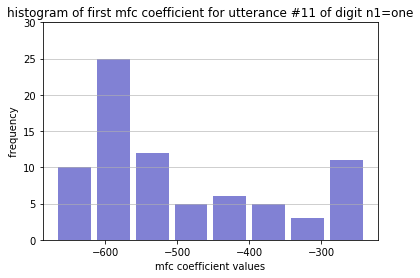

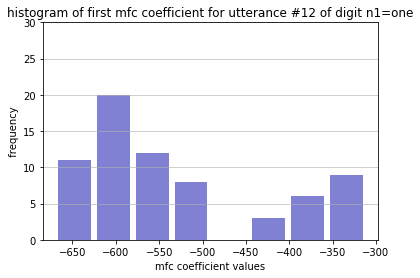

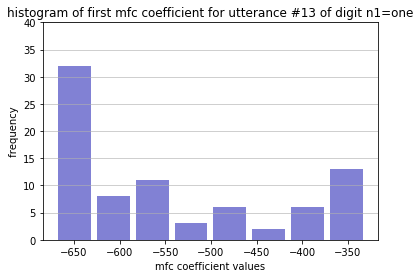

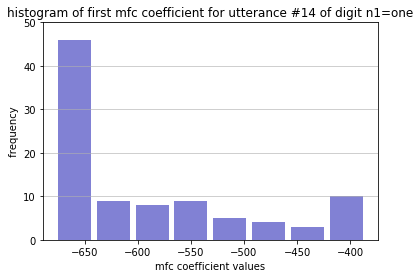

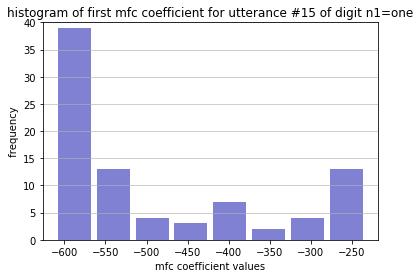

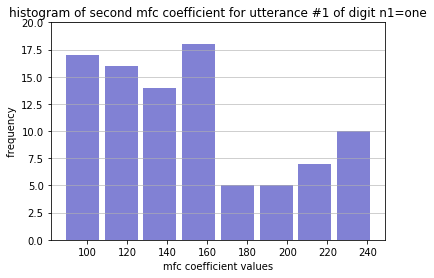

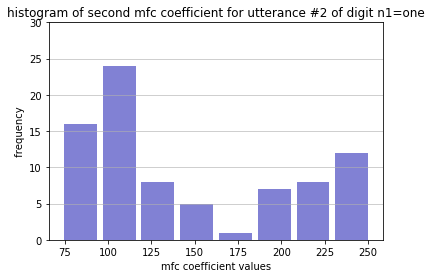

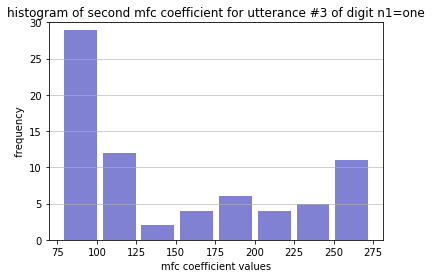

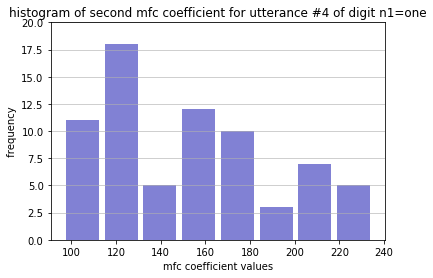

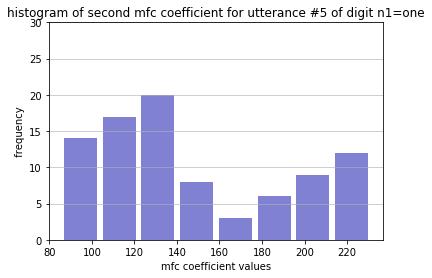

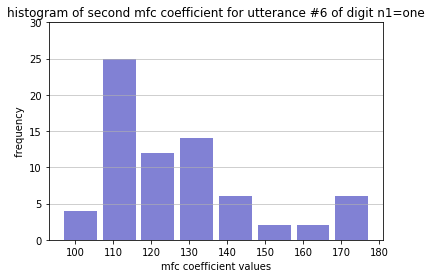

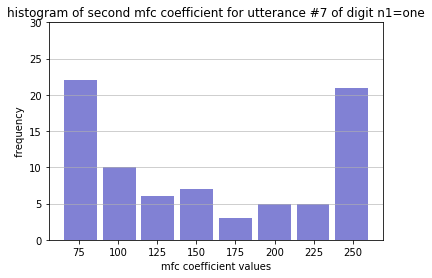

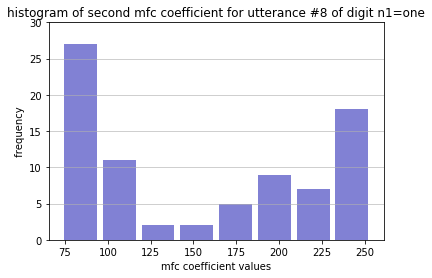

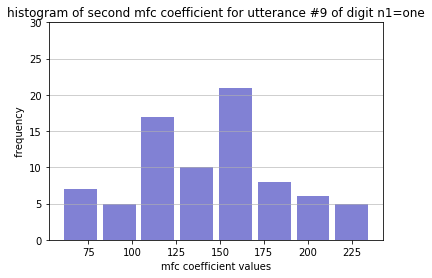

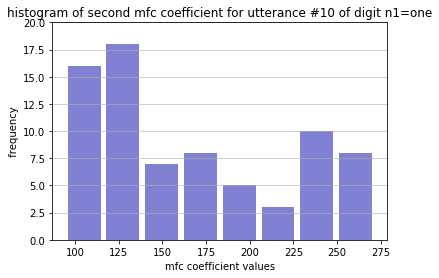

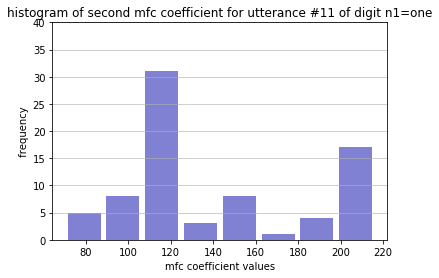

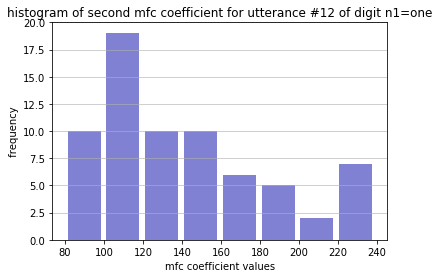

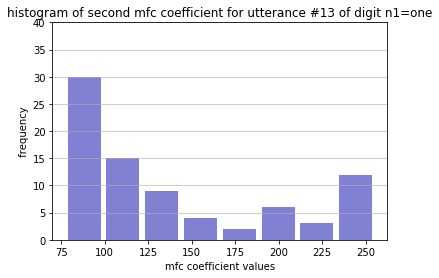

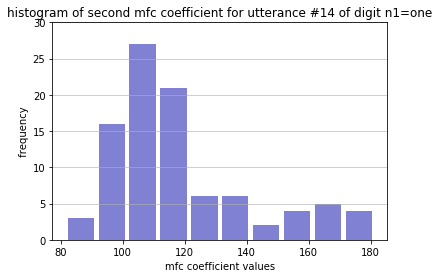

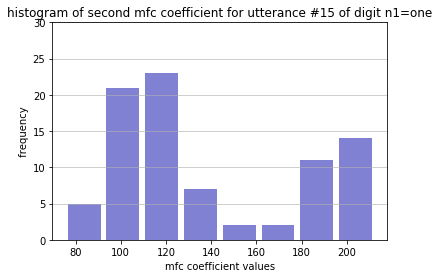

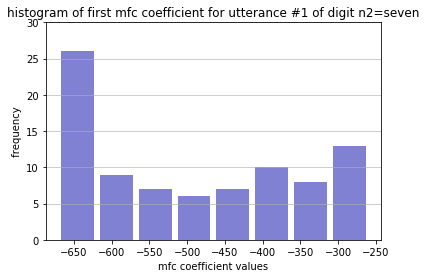

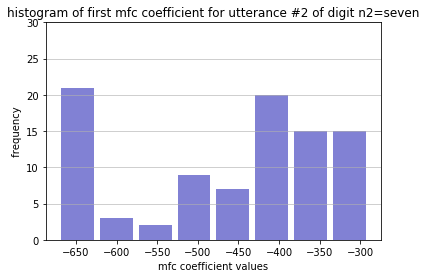

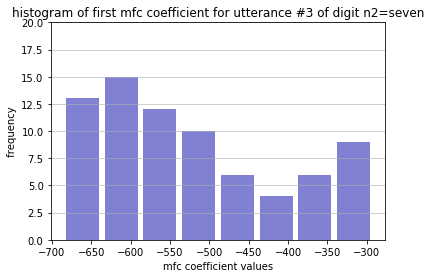

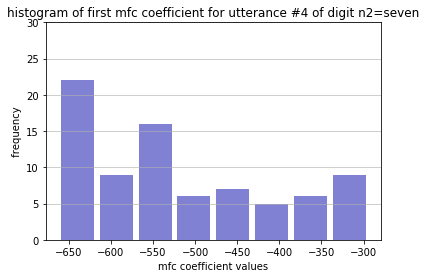

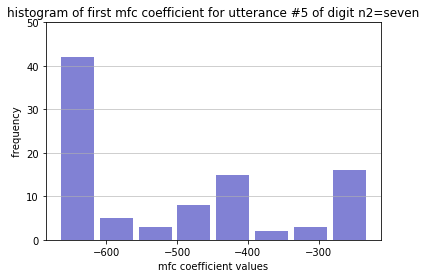

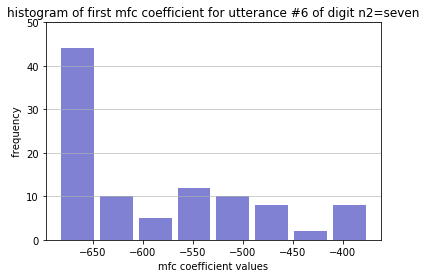

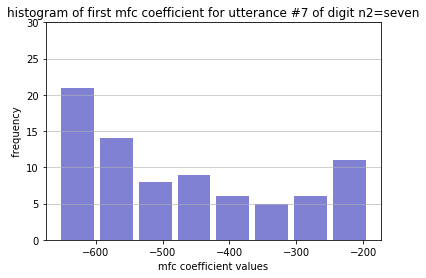

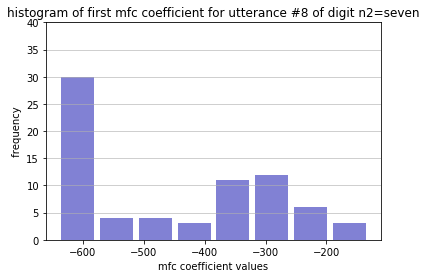

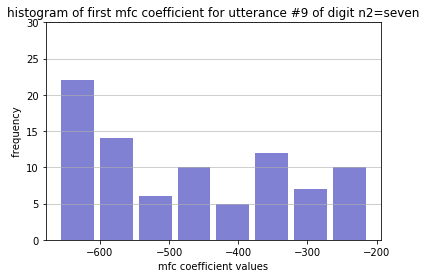

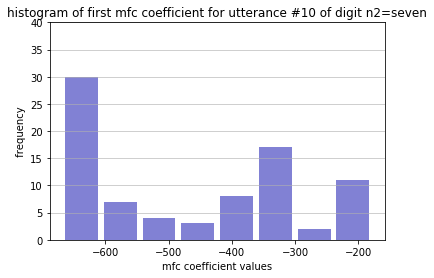

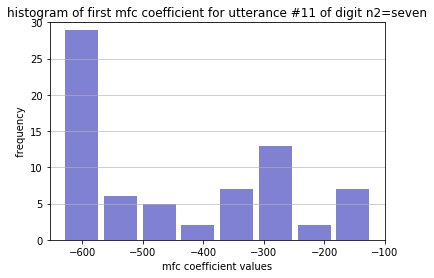

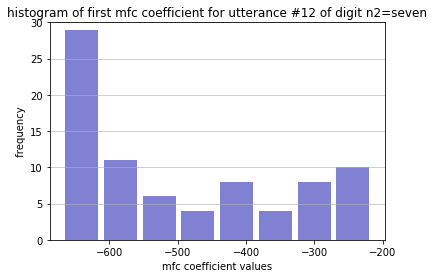

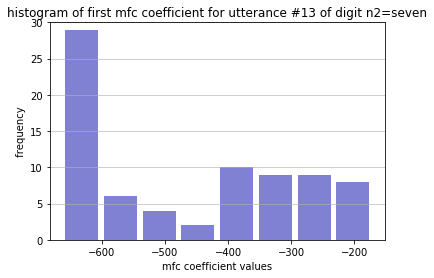

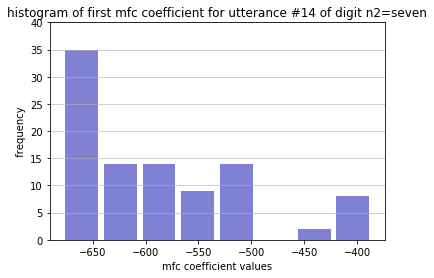

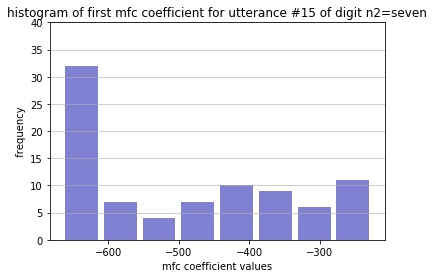

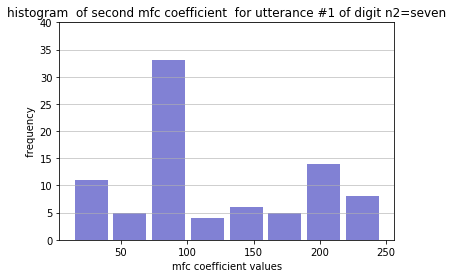

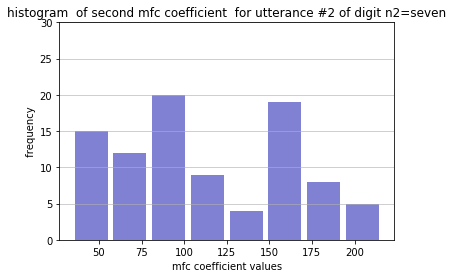

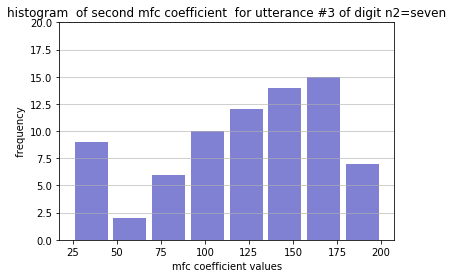

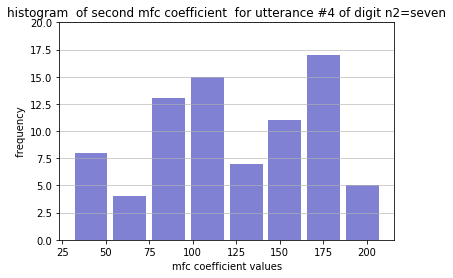

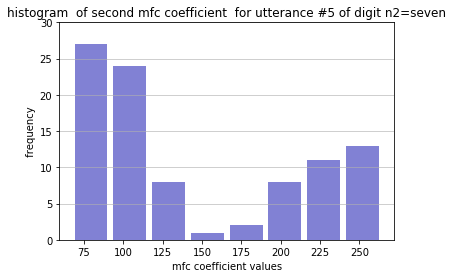

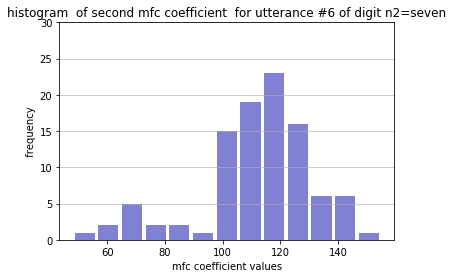

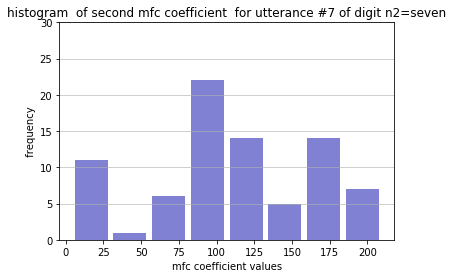

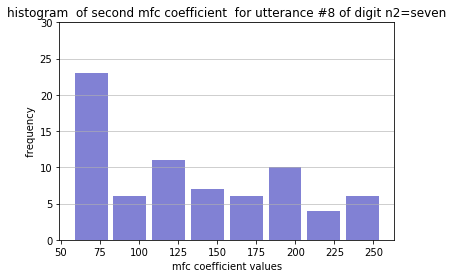

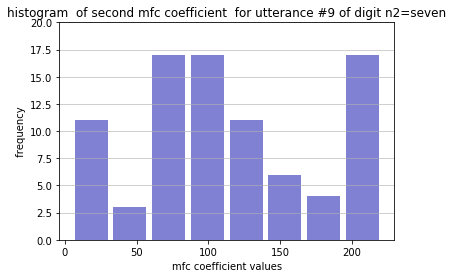

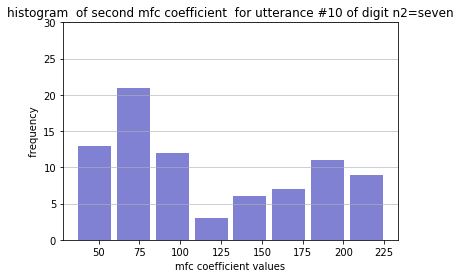

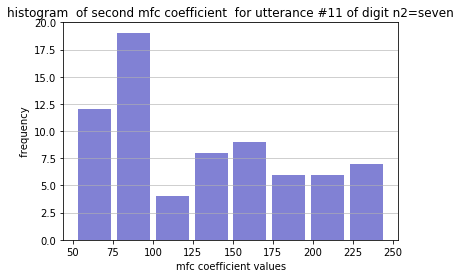

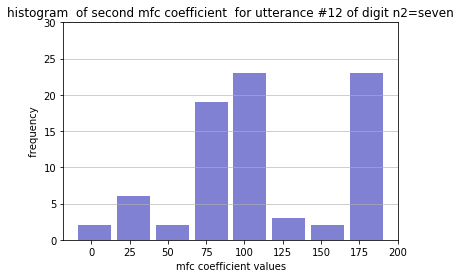

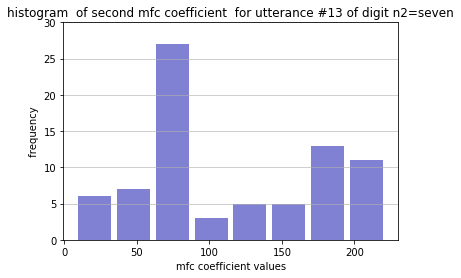

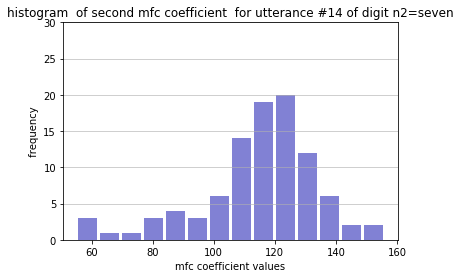

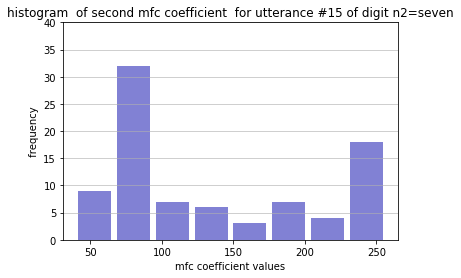

In [157]:
import matplotlib.pyplot as plt
import numpy
print(type(mfccs[0]))

ones_1=[]
ones_2=[]

for i in range(len(mfccs)):
    if(digit_list[i]==1):
        ones_1.append(mfccs[i][0])
        ones_2.append(mfccs[i][1])

# print(len(mfccs))
# print(len(mfccs[0]))
# print(len(mfccs[0][0]))

# plt.rcParams['figure.figsize'] = [10, 5]
# # %matplotlib inline  
# %matplotlib notebook

def hist(data, coef, title):
   
    plt.figure()
    n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',alpha=0.5, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('mfc coefficient values')
    plt.ylabel(' frequency ')
    plt.title(title)
    
    maxval = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxval / 10) * 10 if maxval % 10 else maxval + 10)
    plt.show()

# print(len(ones))
# print(len(ones[0]))
# print(len(ones[0][0]))

i=0
for p in ones_1:
    i+=1
    hist(p, 'first', 'histogram of first mfc coefficient for utterance #'+str(i)+' of digit n1=one')
    
i=0
for p in ones_2:
    i+=1
    hist(p, 'second', 'histogram of second mfc coefficient for utterance #'+str(i)+' of digit n1=one')
    

# for i in range(13):
#     print(len(mfccs[33][i]))
# for i in range(13):
#     print(len(mfcc_deltas[33][i]))
# for i in range(13):
#     print(len(mfcc_delta2s[33][i]))





sevens_1=[]
sevens_2=[]

for i in range(len(mfccs)):
    if(digit_list[i]==7):
        sevens_1.append(mfccs[i][0])
        sevens_2.append(mfccs[i][1])




i=0
for p in sevens_1:
    i+=1
    hist(p, 'first', 'histogram of first mfc coefficient for utterance #'+str(i)+' of digit n2=seven')
    
i=0
for p in sevens_2:
    i+=1
    hist(p, 'second', 'histogram  of second mfc coefficient  for utterance #'+str(i)+' of digit n2=seven')
    


Βρίσκουμε τους πίνακες συσχέτισης των mfccs για συγκεριμένες εκφωνήσεις και τους συγκρίνουμε με αυτούς των mfscs (spectrum αντί για cepstrum). Η ετεροσυχέτιση για κάθε δύο συντελεστές και η αυτοσυσχέτιση υπολογίζονται επί των τιμών των συντελεστών στα διαφορετικά παράθυρα της εκφώνησης.

Παρατηρούμε ότι στην περίπτωση των mfccs οι τιμές των ετεροσυσχετίσεων είναι πολύ πιο κοντά στο μηδέν σε σχέση με αυτές στα mfscs. Αυτή είναι μια επιθυμητή ιδιότητα για τα χαρακτηριστικά που αξιοποιούνται στο learning. Θέλουμε να είναι ασυσχέτιστα ώστε το καθένα να προσθέτει μια καινούριο πληροφορία που χαρακτηρίζει το δείγμα και τελικά να πάρουμε όσο το δυνατόν περισσότερη και πιο συμπυκνωμένη πληροφορία. Αυτός είναι και ο λόγος που προτιμάμε τα mfccs ως περιγραφητές.

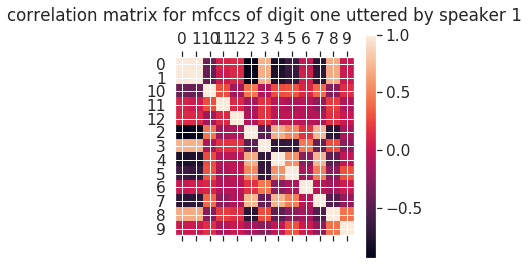

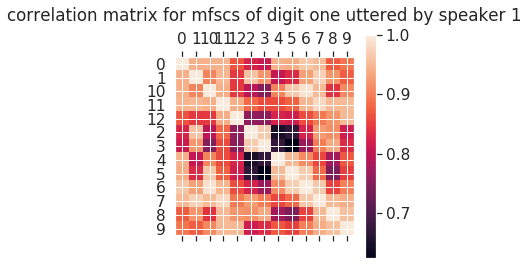

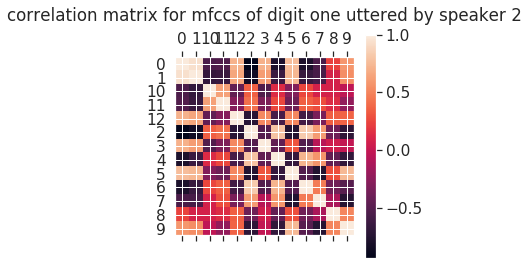

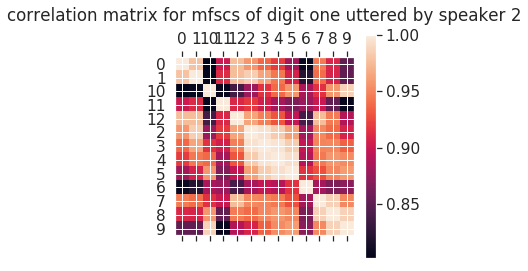

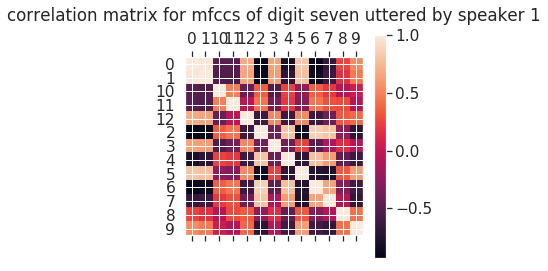

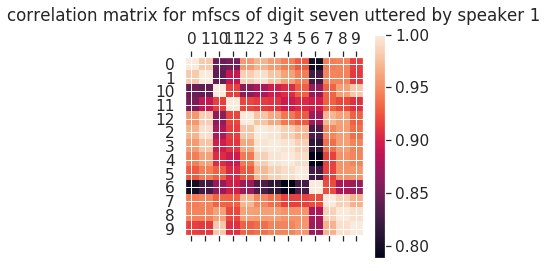

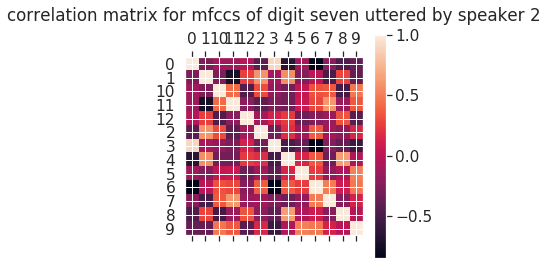

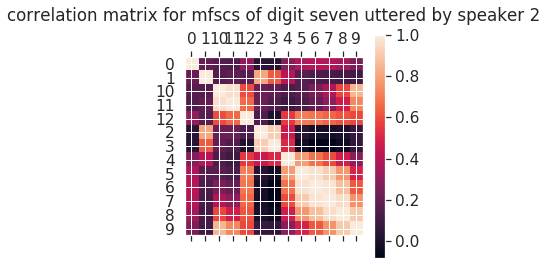

In [206]:
%matplotlib inline
# %matplotlib notebook
import pandas as pd

def cor_mat(j,title):
    df = { str(i) : mfccs[j][i] for i in range(13)}
    df = pd.DataFrame(df)
    df.corr()
    plt.figure
    plt.matshow(df.corr())
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)
    plt.colorbar()
    plt.title(title)
    plt.show()


    df = { str(i) : mfscs[j][i] for i in range(13)}
    df = pd.DataFrame(df)
    df.corr()
    plt.figure
    plt.matshow(df.corr())
    plt.xticks(range(len(df.columns)), df.columns)
    plt.yticks(range(len(df.columns)), df.columns)
    plt.colorbar()
    plt.title(title.replace('mfccs','mfscs'))
    plt.show()

cor_mat(0,'correlation matrix for mfccs of digit one uttered by speaker 1\n')
cor_mat(1,'correlation matrix for mfccs of digit one uttered by speaker 2\n')

cor_mat(15*6,'correlation matrix for mfccs of digit seven uttered by speaker 1\n')
cor_mat(15*6+1,'correlation matrix for mfccs of digit seven uttered by speaker 2\n')

### ΒΗΜΑ 5

Στο σημείο αυτό κατασκεύαζουμε τα διανύσματα χαρακτηριστικών. Για κάθε εκφώνηση έχουμε μεταβλητό αριθμό παραθύρων. Έτσι θα χρειαστεί να κάνουμε κάποιου είδους ενοποίηση των χαρακτηριστικών των παραθύρων. Επιλέγουμε να πάρουμε το μέσο όρο και τη διασπορά των συντελεστών πάνω στα διάφορα παράθυρα της εκφώνησης, οπότε απαλείφεται η διάσταση των παραθύρων από το διάνυσμα χαρακτηριστικών. Κάνουμε μια οπτικοποίηση του χώρου των χαρακτηριστικών. Βλέπουμε πως μεταβάλλονται τα lables συναρτήσει των πρώτων δυο χαρακτηριστικών. Αν και δεν υπάρχει απόλυτος διαχωρισμός παρατηρούμε κάποιου είδους clustering, πράγμα καλό για το classification



13
(133, 78)
(133,)


Text(0.5, 1.0, 'dataset first two columns illustation')

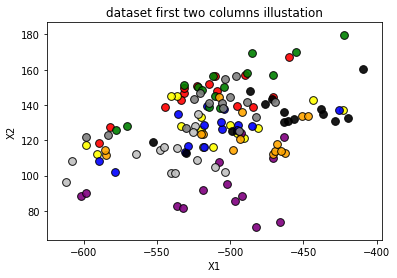

In [119]:
X_data = []
print(len(mfccs[0]))
# print(np.mean(mfccs[i],axis=1))
for i in range(len(mfccs)):   
    X_data.append(np.concatenate(( np.mean(mfccs[i],axis=1), np.var(mfccs[i],axis=1), 
            np.mean(mfcc_deltas[i],axis=1), np.var(mfcc_deltas[i],axis=1), 
                np.mean(mfcc_delta2s[i],axis=1), np.var(mfcc_delta2s[i],axis=1) ), axis=0)) 

X_data = np.array(X_data)
print(X_data.shape)
Y_data = np.array(digit_list)
print(Y_data.shape)


X0, X1 = X_data[:,0], X_data[:,1]
colors = ['brown', 'red', 'yellow', 'blue', 'green', 'black', 'purple', 'orange', 'silver', 'grey']
fig, ax = plt.subplots()
for label in range(1,10):
    ax.scatter(
        X0[Y_data == label], X1[Y_data == label],
        c=(colors[int(label)]), label=int(label),
        s=60, alpha=0.9, edgecolors='k'
    )
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('dataset first two columns illustation')

### ΒΗΜΑ 6

Επαναλαμβάνουμε την οπτικοποίηση του χώρου χαρακτηριστικών και απόφασης στις 2 και 3 διαστάσεις. Ως χαρακτηριστικά παίρνουμε 2 και 3 αντίστοιχα συνιστώσες PCA και απεικονίζουμε τις κλάσεις συναρτήσει αυτών στο χώρο. Ανάλογα με την κλάση δίνουμε διαφορετικό χρώμα στα σημεία. Παρατηρούμε και πάλι clustering με επικαλύψεις φυσικά.

Text(0.5, 0.92, 'dataset 3d PCA illustation')

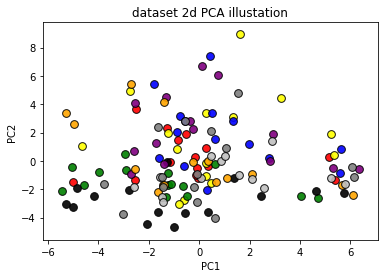

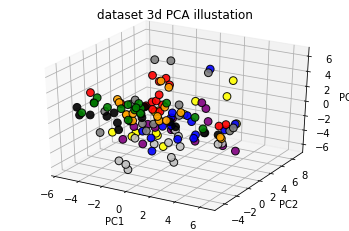

In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_d = pd.DataFrame(data=X_data)
X_d = StandardScaler().fit_transform(X_d)
X_scaled = np.array(X_d)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_d)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
X_d = np.array(principalDf)

X0, X1 = X_d[:,0], X_d[:,1]
colors = ['brown', 'red', 'yellow', 'blue', 'green', 'black', 'purple', 'orange', 'silver', 'grey']
fig, ax = plt.subplots()
for label in range(1,10):
    ax.scatter(
        X0[Y_data == label], X1[Y_data == label],
        c=(colors[int(label)]), label=int(label),
        s=60, alpha=0.9, edgecolors='k'
    )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')  
ax.set_title('dataset 2d PCA illustation')
    
    
    
    
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt    
X_d = pd.DataFrame(data=X_data)
X_d = StandardScaler().fit_transform(X_d)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_d)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
X_d = np.array(principalDf)

X0, X1, X2 = X_d[:,0], X_d[:,1], X_d[:,2]
colors = ['brown', 'red', 'yellow', 'blue', 'green', 'black', 'purple', 'orange', 'silver', 'grey']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for label in range(1,10):
    ax.scatter(
        X0[Y_data == label], X1[Y_data == label], X2[Y_data == label],
        c=(colors[int(label)]), label=int(label),
        s=60, alpha=0.9, edgecolors='k'
    )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('dataset 3d PCA illustation')

### ΒΗΜΑ 7

Στο βήμα αυτό χρησιμοποιούμε τα διανύσματα χαρακτηριστικών των εκφωνήσεων για να κάνουμε ταξινόμηση  των εκφωνήσεων. Για το σκοπό αυτό χωρίζουμε το dataset σε train και test. 
Αξιοποιούνται ως ταξινομητές ο knn, ο svm, ο bayesian που έχουμε υλοποιήσει οι ίδιοι και αυτός της sklearn.
Τα ποσοστά επιτυχίας είναι λίγο κάτω από 50% με τον knn για k=1 να επιτυγχάνει το καλύτερο ποσοστό.

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
     X_scaled, Y_data, test_size=0.3, random_state=42, shuffle=True)

In [122]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import learning_curve
import numpy as np

class BayesianClassifier(BaseEstimator, ClassifierMixin):
    # Bayesian Classifier, based on Naive Bayes Classifier
    # Labels are supposed to be in range[0, len(n_labels)]
    def __init__(self):
        # Χ_mean: numpy.ndarray of shape (n_classes, n_features)
        self.a_priori = None
        n_labels = None
        n_features = None
        var = None
        sigma = None
        avg = None
    
    def fit(self, X, y):
        self.n_labels = len(unique_labels(y))
        self.n_features = X.shape[1]
        
        # Find a priori probabilities
        labels = [np.sum([y == label]) for label in unique_labels(y)]
        y_train_size = len(y)
        self.a_priori = [(label / y_train_size) for label in labels]

        # Find mean,var for each class/label
        self.avg = np.zeros((self.n_labels, self.n_features))
        avgq = np.zeros((self.n_labels, self.n_features))
        cnt = np.zeros((self.n_labels, self.n_features))
        for k in range(len(X)):
            for i in range(self.n_features):
                cnt[int(y[k])-1][i] += 1
                self.avg[int(y[k])-1][i] += X[k][i]
                avgq[int(y[k])-1][i] += X[k][i]**2
        # μ
        self.avg = np.true_divide(self.avg, cnt) 
        avgq = np.true_divide(avgq, cnt)
        # σ^2, σ
        self.var = avgq - (self.avg)**2
        self.sigma = (self.var)**0.5
        
        return self
    
        
    def predict(self, X):
        # Bayes Classifier predict on given test data 
        # return [np.argmin( (np.sum(np.log(self.sigma + 0.0001), axis=1) + np.sum(np.true_divide((X[i] - self.avg)**2, self.var + 0.0001), axis=1)) - np.log(self.a_priori) ) for i in len(X)]
        y_predict = np.zeros(len(X))
        i = 0
        log_a_priori = np.log(self.a_priori)
        for x in X:
            expPart = np.true_divide((x - self.avg)**2, self.var + 10**(-6))
            sumPart = np.sum(expPart, axis=1)
            varPart = np.sum(np.log(self.sigma + 10**(-6)), axis=1)
            res = (varPart + sumPart) - log_a_priori
            y_predict[i] = np.argmin(res) + 1
            i += 1
        
        return y_predict
    
    
    def score(self, X, y_truth):
        y_predict = self.predict(X)
        
        return ( np.sum([y_predict == y_truth]) ) / ( len(y_predict) )

In [123]:
# X_train = np.concatenate((X_train, X_train))
# Y_train = np.concatenate((Y_train, Y_train))

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report




clf = BayesianClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print('accuracy score for our bayesian classifier = ',accuracy_score(Y_true, Y_predict))

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
print('accuracy score for sklearn bayesian classifier = ',accuracy_score(Y_true, Y_predict))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)
print("KNN Score:")
print(accuracy_score(Y_test, y_predict))

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
y_predict = svm.predict(X_test)
print("SVM Score:")
print(accuracy_score(Y_test, y_predict))

accuracy score for our bayesian classifier =  0.45
accuracy score for sklearn bayesian classifier =  0.5
KNN Score:
0.5
SVM Score:
0.475


Προαιρετικό: Επαυξάνουμε τα χαρακτηριστικά προσθέτοντας zerocrossingrates, magphases και cstfts και παίρνουμε καλύτερα ποσοστά, κοντά στο 60%. Τα χαρακτηριστικά αυτά αυτά φαίνεται ότι περιείχαν επιπλέον πληροφορίες για τις εκφωνήσεις που βοήθησαν στον διαχωρισμό τους.

In [130]:
mfccs=[]
mfcc_deltas=[]
mfcc_delta2s=[]
zcrs=[]
magphases=[]
onsets=[]
pitches=[]
cstfts=[]

for w in wav:
    mfcc_tmp=librosa.feature.mfcc(y=w, sr=16000, n_mfcc=13, hop_length=int(sample_rate*hop), win_length=int(sample_rate*window_width))
    mfccs.append(mfcc_tmp)
    mfcc_deltas.append(librosa.feature.delta(mfcc_tmp))
    mfcc_delta2s.append(librosa.feature.delta(mfcc_tmp, order=2))
    
    zcr=librosa.feature.zero_crossing_rate(w)
    zcrs.append(zcr)
                
    S, phase = librosa.magphase(librosa.stft(w))
    magphases.append(librosa.feature.spectral_rolloff(S=S, sr=16000))

    onset_env = librosa.onset.onset_strength(y=w, sr=16000)
    onsets.append(onset_env)

    ccstft=librosa.feature.chroma_stft(y=w, sr=16000)
    cstfts.append(ccstft)

    pitch, magnitudes = librosa.piptrack(y=w, sr=16000)
    pitches.append(pitch)

    

X_data_aug = []
print(len(mfccs[0][0]))
print(len(pitches[0]))
for i in range(len(mfccs)):   
    X_data_aug.append(np.concatenate(( np.mean(mfccs[i],axis=1), np.var(mfccs[i],axis=1), 
            np.mean(mfcc_deltas[i],axis=1), np.var(mfcc_deltas[i],axis=1), 
                np.mean(mfcc_delta2s[i],axis=1), np.var(mfcc_delta2s[i],axis=1), 
                    np.mean(zcrs[i],axis=1)
                                      , np.mean(magphases[i],axis=1)
                         ,np.mean(cstfts[i],axis=1)
                                     ), axis=0)) 

    
X_d_a = pd.DataFrame(data=X_data_aug)
X_d_a = StandardScaler().fit_transform(X_d_a)
X_scaled_a = np.array(X_d_a)

from sklearn.model_selection import train_test_split
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(
     X_scaled_a, Y_data, test_size=0.3, random_state=42, shuffle=True)

# X_train = np.concatenate((X_train, X_train))
# Y_train = np.concatenate((Y_train, Y_train))


from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

clf = BayesianClassifier()
clf.fit(X_train_a, Y_train_a)
Y_predict_a = clf.predict(X_test_a)
print('accuracy score for our bayesian classifier = ',accuracy_score(Y_test_a, Y_predict_a))

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train_a, Y_train_a)
Y_predict = clf.predict(X_test_a)
print('accuracy score for sklearn bayesian classifier = ',accuracy_score(Y_test_a, Y_predict_a))

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_a, Y_train_a)
y_predict_a = knn.predict(X_test_a)
print("KNN Score:")
print(accuracy_score(Y_test_a, y_predict_a))

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_train_a, Y_train_a)
y_predict_a = svm.predict(X_test_a)
print("SVM Score:")
print(accuracy_score(Y_test_a, y_predict_a))


/home/bill/.local/lib/python3.5/site-packages/librosa/filters.py:222: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


67
1025
accuracy score for our bayesian classifier =  0.55
accuracy score for sklearn bayesian classifier =  0.55
KNN Score:
0.525
SVM Score:
0.6


### Βήμα 8
Χρησιμοποιούμε ένα lstm για να παράξουμε το αντίστοιχο συνημίτονο από μια τυχαία ακολουθία ημιτόνων (τυχαία αρχική φάση). Θέλουμε να παράγεται δηλαδή ένα σήμα με προήγηση φάσης π/2 σε σχέση με το σήμα εισόδου. Χρησιμοποιούμε ένα ακολουθιακό μοντέλου ενός επιπέδου με 100 cells. Ως συνάρτηση απωλειών χρησιμοποιούμε το τετραγωνικό σφάλμα.

Γίνεται εκπαίδευση πάνω σε 97 ημίτονα και τεστ πάνω σε 3. Βλέπουμε ότι μόνο στο πολύ αρχικά δείγματα δεν έγινε σωστή πρόβλεψη ενώ το υπόλοιπο σήμα είναι σωστό. Τα loss είναι πολύ μικρά στα τελευταία epochs για το train και το test. Πιθανά αν το αφήναμε περισσότερη ώρα να πετύχαινε και τα αρχικά δείγματα αλλά το κρίναμε επουσιώδες ως μεταβατικό φαινόμενο.

STEP: 0 loss: 0.06188202649354935 test loss: 0.05966568365693092


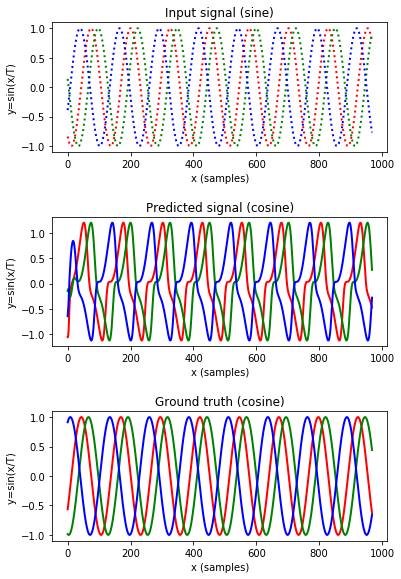

STEP: 1 loss: 0.012095379643142223 test loss: 0.011682812124490738


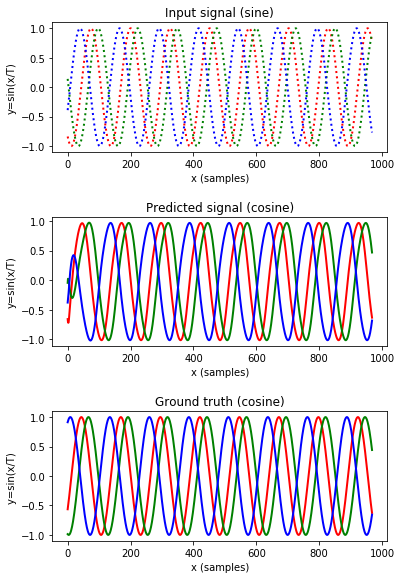

STEP: 2 loss: 0.011004849337041378 test loss: 0.01060886774212122


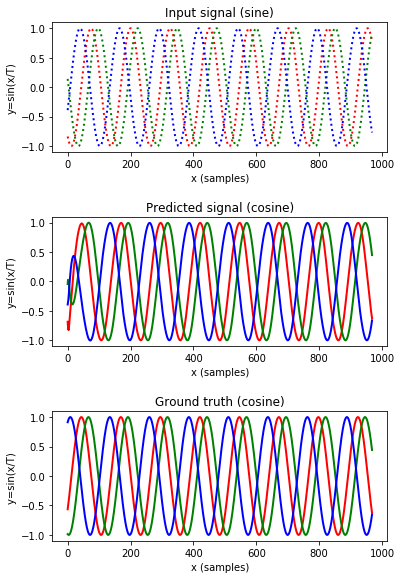

STEP: 3 loss: 0.010424381121993065 test loss: 0.01196307223290205


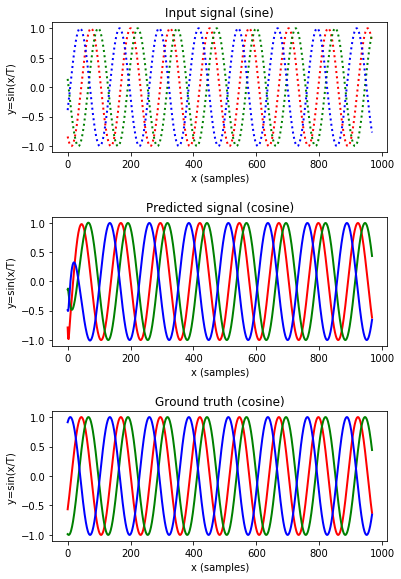

STEP: 4 loss: 0.010388244874775416 test loss: 0.011793420650064945


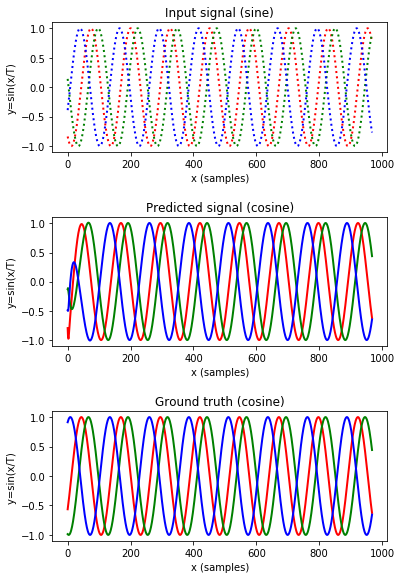

STEP: 5 loss: 0.010215546935796738 test loss: 0.011312272399663925


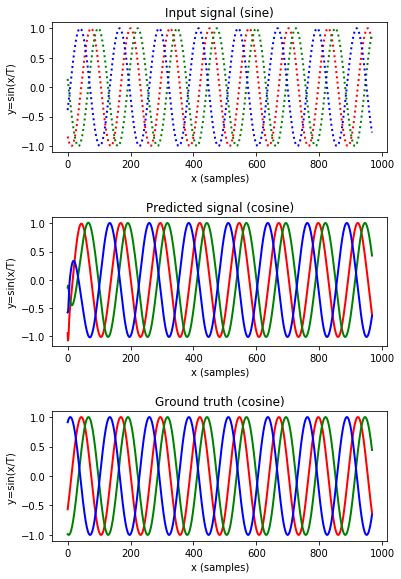

STEP: 6 loss: 0.009653574787080288 test loss: 0.011836457997560501


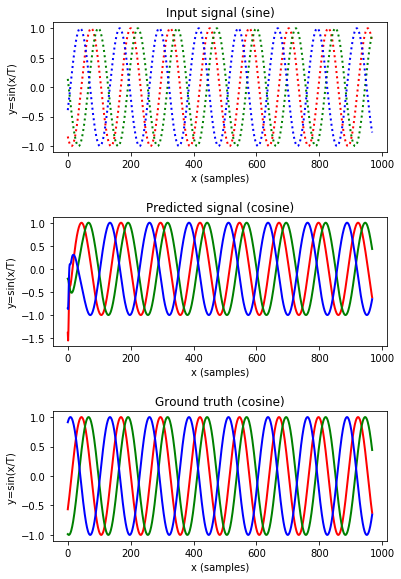

STEP: 7 loss: 0.008572901599109173 test loss: 0.008905340917408466


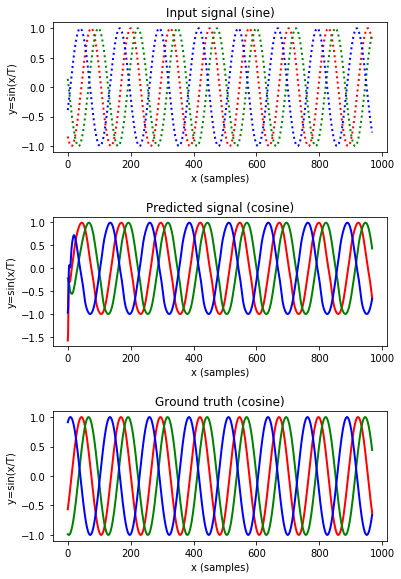

STEP: 8 loss: 0.0071160099469125275 test loss: 0.008098897524178028


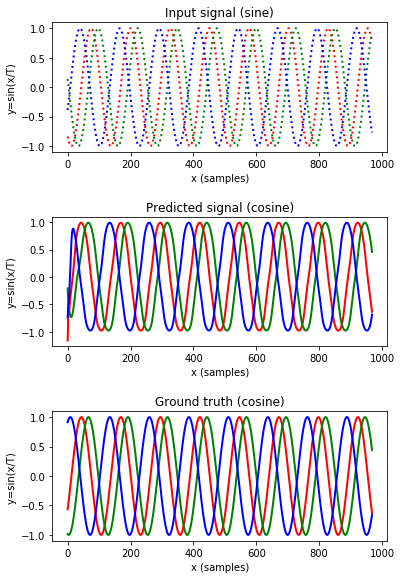

STEP: 9 loss: 0.0064158192835748196 test loss: 0.008226817473769188


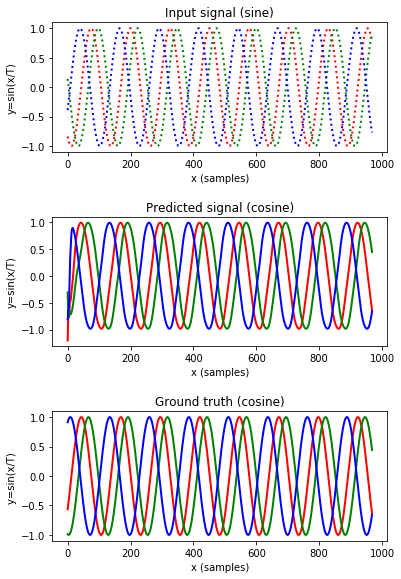

STEP: 10 loss: 0.0057012396864593035 test loss: 0.006251242011785507


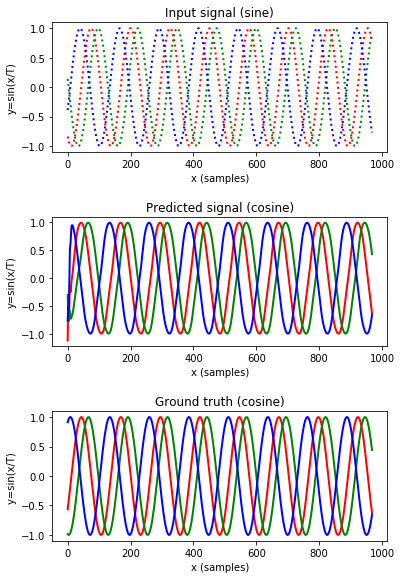

STEP: 11 loss: 0.0051755504682660135 test loss: 0.005780375096946955


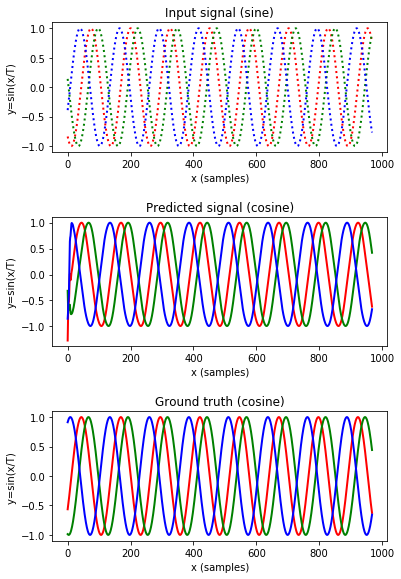

STEP: 12 loss: 0.0046922746114432815 test loss: 0.005629413761198521


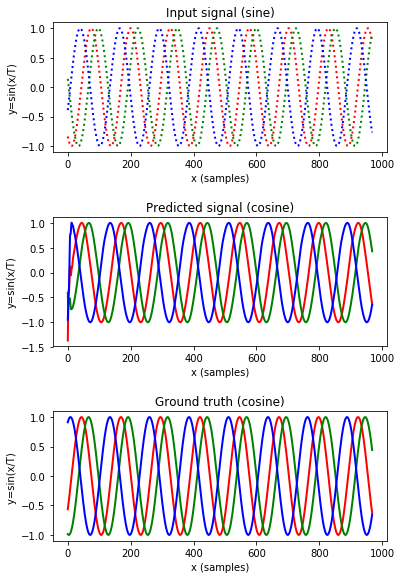

STEP: 13 loss: 0.0043255910277366644 test loss: 0.004835275001823902


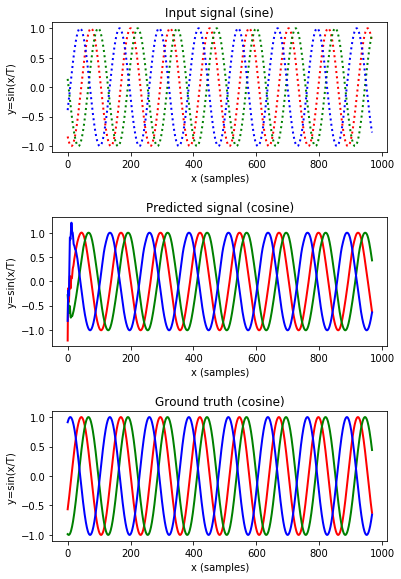

STEP: 14 loss: 0.0041461819782853135 test loss: 0.0047017778269946575


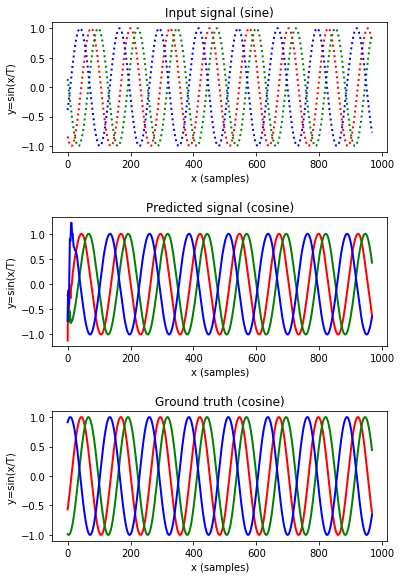

In [160]:
from __future__ import print_function
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

SEED = 1
np.random.seed(SEED)
torch.manual_seed(SEED)

T = 20
L = 1000
N = 100

x = np.empty((N, L), 'int32')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float32')


# cosine has a phase lead = pi/2 => samples lead = T*pi/2 =~ 31 

input = torch.from_numpy(data[3:, :-31])
target = torch.from_numpy(data[3:, 31:])
test_input = torch.from_numpy(data[:3, :-31])
test_target = torch.from_numpy(data[:3, 31:])

class Sequence(nn.Module):
    def __init__(self, hdim):
        super(Sequence, self).__init__()
        self.rnn = nn.RNNCell(1, hdim)
        self.linear = nn.Linear(hdim, 1)
        self.hdim = hdim

    def forward(self, input, future = 0):
        outputs = []
        
        # create a tensor for the hidden state initialized to zero
        h_t = torch.zeros((input.size(0),self.hdim))

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            # apply the RNN
            h_t = self.rnn(input_t,h_t)
            # apply the linear layer 
            output = self.linear(h_t)
            outputs.append(output)
        for i in range(future):# if we should predict the future
            
            # apply the RNN to the last value
            h_t = self.rnn(outputs[-1],h_t)
            output = self.linear(h_t)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

seq = Sequence(100)
criterion = nn.MSELoss()
optimizer = optim.LBFGS (seq.parameters(), lr=0.5)

#begin to train
for i in range(15):
    
    
    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('\rSTEP:', i,'loss:', loss.item(), end='')
        loss.backward()
        return loss
    optimizer.step(closure)
    
    future = 1
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq.forward(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print(' test loss:', loss.item())
        y = pred.detach().numpy()
    
    # draw the result

    fig, (ax1, ax2, ax3) = plt.subplots(3)
    plt.subplots_adjust(wspace=0.5, hspace=0.5, left=0.125, right=0.9, bottom=1.1, top=2.9)
     
    
    def draw(xi, yi, ycori, color):
        
        
        #ax1.figure(figsize=(30,10))
        ax1.set_title('Input signal (sine)')
        ax1.set_xlabel('x (samples)')
        ax1.set_ylabel('y=sin(x/T)')
        ax1.plot(np.arange(input.size(1)), xi, color+':', linewidth = 2.0)

        
        #ax2.figure(figsize=(30,10))
        ax2.set_title('Predicted signal (cosine)')
        ax2.set_xlabel('x (samples)')
        ax2.set_ylabel('y=sin(x/T)')
        ax2.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
            
        
        #ax3.figure(figsize=(30,10))
        ax3.set_title('Ground truth (cosine)')
        ax3.set_xlabel('x (samples)')
        ax3.set_ylabel('y=sin(x/T) ')
        ax3.plot(np.arange(input.size(1)), ycori, color, linewidth = 2.0)
    
    draw(test_input[0], y[0], test_target[0], 'r')
    draw(test_input[1], y[1], test_target[1], 'g')
    draw(test_input[2], y[2], test_target[2], 'b')
    plt.show()
    #plt.close()

    

### Βήμα 9
Για το παρακάτω μέρος της άσκησης θα χρησιμοποιηθεί ένα μεγαλύτερο σετ δεδομένων, το Free Spoken Digit Dataset (FSDD), που προμηθευτήκαμε από το github της εκφώνησης, το οποίο περιέχει συνολικά 2000 εκφωνήσεις, 200 για κάθε ψηφίο (0-9).

In [238]:
from glob import glob
import librosa
from sklearn.preprocessing import StandardScaler
import os
import numpy as np


def parser(directory):
    # Parse relevant dataset info
    files = glob(os.path.join(directory, '*.wav'))
#     print(files)
    fnames = [f.split('/')[-1].split('.')[0].split('_') for f in files]
#     print(fnames)
    ids = [f[2] for f in fnames]
    y = [int(f[0]) for f in fnames]
    speakers = [f[1] for f in fnames]
    _, Fs = librosa.core.load(files[0], sr=None)

    def read_wav(f):
        global Fs
        wav, fs = librosa.core.load(f, sr=None)
        return wav

    # Read all wavs
    wavs = [read_wav(f) for f in files]

    # Extract MFCCs for all wavs
    window = 30 * Fs // 1000
    step = window // 2
    frames = [librosa.feature.mfcc(wav, Fs, n_fft=window, hop_length=window - step, n_mfcc=6).T for wav in wavs]
    # Print dataset info
    print('Total wavs: {}'.format(len(frames)))

    # Standardize data
    scaler = StandardScaler()
    scaler.fit(np.concatenate(frames))
    for i in range(len(frames)):
        frames[i] = scaler.transform(frames[i])

    # Split to train-test
    X_train, y_train, spk_train = [], [], []
    X_test, y_test, spk_test = [], [], []
    test_indices = ['0', '1', '2', '3', '4']
    for idx, frame, label, spk in zip(ids, frames, y, speakers):
        if str(idx) in test_indices:
            X_test.append(frame)
            y_test.append(label)
            spk_test.append(spk)
        else:
            X_train.append(frame)
            y_train.append(label)
            spk_train.append(spk)

    return X_train, X_test, y_train, y_test, spk_train, spk_test

In [239]:
X_train, X_test, y_train, y_test, spk_train, spk_test = parser("./recordings")

Total wavs: 2000


Χωρίζουμε σε train, validation και test sets, με αναλογίες 80% και 20 % για το training και validation sets. 

In [240]:
from sklearn.model_selection import train_test_split

X_tr, X_cv, y_tr, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.20)

In [241]:
print(len(X_tr))
print(len(X_cv)) 
print()

s = 0
for i in range(len(X_tr)):
    s += X_tr[i].shape[0]
print(s)  # toses exades

s = 0
for i in range(len(X_cv)):
    s += X_cv[i].shape[0]
print(s)  # toses exades

s = 0
for i in range(len(X_test)):
    s += X_test[i].shape[0]
print(s)  # toses exades

1440
360

39547
9942
5143


Παρατηρούμε ότι το training set αποτελείται από 1440 δείγματα, ενώ το validation από 360 δείγματα. Από τα mfcc χαρακτηριστικά, θα αξιοποιήσουμε στο learning μας μόνο τα 6 εξ αυτών. Έτσι, το κάθε φώνημα θα αποτελείται από 6 features. Παρατηρούμε ότι έχουμε 39693 φωνήματα (εξάδες features) στο training set, 9796 στο validation set και 5143 εναπομείναντα στο test set.

Παρακάτω, φτιάχνουμε τις 2D και 3D λίστες που απαιτούνται για το learning των δειγμάτων.

In [242]:
digits_train_2d = [0, 0, 0, 0, 
                   0, 0, 0, 0, 
                   0, 0]

for i in range(len(X_tr)):
    if (type(digits_train_2d[y_tr[i]]) == int): 
        digits_train_2d[y_tr[i]] = X_tr[i]
    else:
        digits_train_2d[y_tr[i]] = np.concatenate((digits_train_2d[y_tr[i]], X_tr[i]), axis=0)

        
digits_cv_2d = [0, 0, 0, 0, 
                0, 0, 0, 0, 
                0, 0]

for i in range(len(X_cv)):
    if (type(digits_cv_2d[y_cv[i]]) == int): 
        digits_cv_2d[y_cv[i]] = X_cv[i]
    else:
        digits_cv_2d[y_cv[i]] = np.concatenate((digits_cv_2d[y_cv[i]], X_cv[i]), axis=0)
        
        
digits_test_2d = [0, 0, 0, 0, 
                0, 0, 0, 0, 
                0, 0]

for i in range(len(X_test)):
    if (type(digits_test_2d[y_test[i]]) == int): 
        digits_test_2d[y_test[i]] = X_test[i]
    else:
        digits_test_2d[y_test[i]] = np.concatenate((digits_test_2d[y_test[i]], X_test[i]), axis=0)

In [244]:
digits_train_3d = [[], [], [], [], 
                   [], [], [], [], 
                   [], []]

for i in range(len(X_tr)):
    digits_train_3d[y_tr[i]].append(np.array(X_tr[i]))

digits_cv_3d = [[], [], [], [], 
                [], [], [], [], 
                [], []]

for i in range(len(X_cv)):
    digits_cv_3d[y_cv[i]].append(np.array(X_cv[i]))
    
    
digits_test_3d = [[], [], [], [], 
                [], [], [], [], 
                [], []]

for i in range(len(X_test)):
    digits_test_3d[y_test[i]].append(np.array(X_test[i]))
    

### Βήμα 10

Στην αναγνώριση προτύπων, τα observable variables μπορούν να αναπαρασταθούν από 39 MFCC features που λαμβάνονται απο το αντίστοιχο audio frame. Με χρήση του HMM model, δεν χρειάζεται να ψάχνουμε την ακολουθία των φωνημάτων one-by-one, κάτι που θα είχε ως αποτέλεσμα η πολυπλοκότητα να μεγάλωνε εκθετικά με την αύξηση του πλήθους των φωνημάτων. Από την άλλη, με τον Viterbi algorithm or άλλες HMM methods, μπορούμε να βρούμε την βέλτιστη ακολουθία σε πολυωνιμικό χρόνο με χρήση δυναμικού προγραμματισμού. Στην μελέτη μας, θα περιοριστούμε σε 6 MFCCs features.


Στο σημείο αυτό, θα εκπαιδεύσουμε ένα GMM-HMM model για κάθε ψηφίο. Τα μοντέλα αυτά θα είναι left-right, δηλαδή ο transition matrix τους $A=[a_{ij}]$ θα έχει κενά entries $a_{ij}=0$, όταν $i>j$ ή $j>i+1$, ενώ οι αρχικές πιθανότητες $π_{i}=1$, όταν $i=1$ και $0$ αλλού. Θεωρήσαμε ως αρχικές τιμές των transition probabilities την τιμή 0.5 για όλες τις επιτρεπτές πιθανότητες και τις υπόλοιπες 0, προκειμένου να ισχύει η συνθηκή της ισότητας του αθροίσματος πιθανοτήτων ίσο με τη μονάδα και το left-right , γνωρίζοντας πως οι πιθανότητες που αρχικοποιούνται στο 0 δεν πρόκειται να αλλάξουν ποτέ κατά το training.  
Αξίζει να σημειωθεί ότι στη μελέτη του GMM-HMM model, τα observed variables για ένα φώνημα μοντελοποιούνται με GMM, προκειμένου ένα feature να μπορεί να πάρει αρκετές διαφορετικές τιμές, ενώ τα φωνήματα-states (latient variables) μοντελοποιούνται με ΗΜΜ, δηλαδή με μία Markov Chain που παρέχει πιθανότητες μετάβασης είτε σε ένα άλλο state (transition probability) είτε σε ένα observed variable (emission probability).   
Αρχικά, αρχικοποιούμε τα δέκα μοντέλα, όπως φαίνεται παρακάτω, ορίζοντας τον αριθμό των states και των gaussian mixtures ίσο με 4 και το ends με None, προκειμένου αυτό να βρεθεί κατά το training.   
Σημειώνουμε ότι θα γίνει χρήση του pomegranate module που μας παρέχει έτοιμες υλοποιήσεις για τα GMMs και HMMs μοντέλα.

In [184]:
from pomegranate import *
import numpy as np

hmm = []
for i in range(10):
    # for each digit 0-9
    
    X = digits_train_2d[i] # data from a single digit (can be a numpy array)
    
    n_states = 4 # the number of HMM states
    n_components = 4 # the number of Gaussians
    gmm = True # whether to use GMM or plain Gaussian

    emissions = [] # list of probability distributions for the HMM states
    for j in range(n_states):
        X_ = np.float_(X.copy())
        if gmm:
            a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, n_components, X_)
        else:
            a = MultivariateGaussianDistribution.from_samples(X_)
        emissions.append(a)

    # transition probabilities
    trans_mat = np.array([[0.5, 0.5, 0, 0],
                          [0, 0.5, 0.5, 0], 
                          [0, 0, 0.5, 0.5], 
                          [0, 0, 0, 1.0]])  
    
    starts = [1.0, 0, 0, 0] # your starting probability matrix
    ends = None # your ending probability matrix                

    # Define the GMM-HMM
    hmm.append(HiddenMarkovModel.from_matrix(transition_probabilities=trans_mat, distributions=emissions, 
                                             starts=starts, ends=ends, 
                                             state_names=['s{}'.format(i) for i in range(n_states)])
                                             )

### Βήμα 11

Εκπαιδεύουμε τα μοντέλα με 200 σε πλήθος μέγιστες επαναλήψεις και με χρήση του αλγορίθμου Baum-Welch, με τον οποίο στοχεύουμε να μάθουμε τις emittion και transition probabilites. Ο αλγόριθμος δουλεύει ως εξής: εάν εμείς
γνωρίζουμε την state occupation probability (κατανομή του state κατά το χρόνο t), μπορούμε να μάθουμε τις
emittion και transition probabilites. Εάν γνωρίζουμε αυτές τις δύο πιθανότητες,
μπορούμε να μάθουμε την state distribution στο χρόνο t. Αυτό είναι το chicken and egg problem 
που επιλύεται με τον αλγόριθμο EM. Ο αλγόριθμος EM επιλύει το πρόβλημα στα iteration steps. Σε
κάθε step βελτιστοποιούμε μια latient variable ενώ κρατάμε fixed τα άλλα, ώστε σε κάθε iteration συνεχώς βελτιώνεται η λύση, με την αύξηση της log likelihood. Έτσι, με μεγάλο πλήθος iterations φτάνουμε εν τέλει σε σύγκλιση έχοντας φθάσει σε βελτιστοποίηση.

In [185]:
for i in range(10):
    # Fit the model
    data = digits_train_3d[i].copy()
    hmm[i].fit(data, max_iterations=200, algorithm='baum-welch')

print("Errors are not taken into account for this cell")

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell


### Βήμα 12

Δεδομένου ότι έχουμε κάνει το training των μοντέλων μας, στο σημείο αυτό θα προσπαθήσουμε να προβλέψουμε τα labels του validation set. Θα χρησιμοποιήσουμε τον αλγόριθμο Viterbi, ο οποίος αντί να προσθέτει όλα τα πιθανά state sequences, επιλέγει κάθε φορά το πιο πιθανό μονοπάτι, με βάση το log likelihood.

Το κάθε μοντέλο με χρήση του αλγοριθμού Viterbi θα δώσει για ένα given test sample μία log likelihood να αποτελεί το αντίστοιχο ψηφίο. Θα ακολουθήσουμε τακτική one-vs-all classification προβλέποντας κάθε φορά για ψηφίο, το μοντέλο του οποίου δίνει την μεγαλύτερη log likelihood.

In [186]:
# Predict cv
y_cv_pred = []
for cv_sample in X_cv:
    logp = -1500
    idx = -1
    for i in range(len(hmm)):
        # Run viterbi algorithm and return log-probability
        logp_tmp, _ = hmm[i].viterbi(cv_sample) 
        if (logp_tmp > logp):
            logp = logp_tmp
            idx = i
    # Store the index of the maximum log-probability that is the predicted digit for the cv sample
    y_cv_pred.append(idx)
    
from sklearn.metrics import accuracy_score
print("States: 4, GMM n_components = 4")
print("Accuracy score:\t", accuracy_score(y_cv, y_cv_pred))

States: 4, GMM n_components = 4
Accuracy score:	 0.9777777777777777


##### GridSearch Cross-Validation for optimizing HMM-GMM 

Παρακάτω, χρησιμοποιούμε gridSearch τεχνική πάνω στο validation set, προκειμένου να βρούμε τις βέλτιστες υπερπαραμέτρους του μοντέλου μας. Το μοντέλο GMM-HMM που υλοποιούμε αποτελείται από 10 τέτοια επιμέρους μοντέλα, left-right, ένα για κάθε ψηφίο, όπως περιγράφηκε παραπάνω. Για υπερπαραμέτρους θεωρούμε το πλήθος των states [1-5], των GMM mixtures [2-5], καθώς και των maximum iterations κατά το learning.
Σημειώνουμε ότι δεν θέτουμε ως πιθανή τιμή για το πλήθος των GMM mixtures τη μονάδα όπως κάνουμε στο πλήθος των states, αφού δεν μπορεί να οριστεί με μία gaussian το GMM.

In [187]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
import numpy as np
from pomegranate import *

class HMM(BaseEstimator, ClassifierMixin):
    # Hidden Markov Model using Gaussian Mixtures Model
    # Labels are supposed to be in range[0, len(n_labels)]
    def __init__(self, n_states, n_components, max_iter):
        self.hmm = []
        self.n_states = n_states
        self.n_components = n_components
        self.max_iter = max_iter
    
        
    def fit(self, digits_train_3d, y=None):
        for i in range(10):
            # for each digit 0-9

            X = digits_train_2d[i] # data from a single digit (can be a numpy array)

            gmm = True # whether to use GMM or plain Gaussian
            emissions = [] # list of probability distributions for the HMM states
            for j in range(self.n_states):
                X_ = np.float_(X.copy())
                if gmm:
                    a = GeneralMixtureModel.from_samples(MultivariateGaussianDistribution, self.n_components, X_)
                else:
                    a = MultivariateGaussianDistribution.from_samples(X_)
                emissions.append(a)

            # Transition probabilities
            trans_mat = np.zeros((self.n_states, self.n_states))
            for i in range(self.n_states):
                trans_mat[i][i] += 0.5
                trans_mat[i][np.min([i+1,self.n_states-1])] += 0.5
            
            # Starting probabilities
            starts = np.zeros(self.n_states)
            starts[0] = 1
            
            ends = None # ending probability matrix                

            # Define the GMM-HMM
            self.hmm.append(HiddenMarkovModel.from_matrix(transition_probabilities=trans_mat, distributions=emissions, 
                                                     starts=starts, ends=ends, 
                                                     state_names=['s{}'.format(i) for i in range(self.n_states)]))  

        for i in range(10):
            # Fit the model
            data = digits_train_3d[i].copy()
            self.hmm[i].fit(data, max_iterations=200, algorithm='baum-welch')

        print("Errors are not taken into account for this cell")
        
        return self
    
        
    def predict(self, X):
        y_pred = []
        for sample in X:
            logp = -15000
            idx = -1
            for i in range(len(self.hmm)):
                # Run viterbi algorithm and return log-probability
                logp_tmp, _ = self.hmm[i].viterbi(sample) 
                if logp_tmp > logp:
                    logp = logp_tmp
                    idx = i
            # Store the index of the maximum log-probability
            y_pred.append(idx)
            
        return y_pred

    
    def score(self, X, y_truth):
        y_pred = self.predict(X)
        return accuracy_score(y_truth, y_pred)

In [197]:
# Set the parameters by cross-validation
max_iters = [100, 200, 300]
states = [3, 4, 5]
mixtures = [ 2, 4]

best_params = []
best_score = 0
for max_iter in max_iters:
    for n_states in states:
        for n_components in mixtures:
                        
            # Define model
            hmm = HMM(n_states=n_states, n_components=n_components, max_iter=max_iter)
            # Fit
            hmm.fit(digits_train_3d.copy())
            # Score
            current_score = hmm.score(X_cv, y_cv)
            if best_score < current_score :
                best_score = current_score
                best_params = [max_iter, n_states, n_components]
            
            print('current configuration: ')
            print('max_iter = ',max_iter, '   n_states = ', n_states, '   n_components = ', n_components)    
            print('current_score = ',current_score,'\n')
                
print("Best HMM")
print("Best max_iterations=", best_params[0], 
      ",\nBest n_states=", best_params[1],
      ",\nBest n_mixtures=", best_params[2])

Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  3    n_components =  2
current_score =  0.9583333333333334 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  3    n_components =  4
current_score =  0.9833333333333333 

Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  4    n_components =  2
current_score =  0.9638888888888889 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  4    n_components =  4
current_score =  0.9722222222222222 

Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  5    n_components =  2
current_score =  0.9833333333333333 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  100    n_states =  5    n_components =  4
current_score =  0.9833333333333333 

Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  3    n_components =  2
current_score =  0.95 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  3    n_components =  4
current_score =  0.9666666666666667 

Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  4    n_components =  2
current_score =  0.9666666666666667 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  4    n_components =  4
current_score =  0.9722222222222222 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  5    n_components =  2
current_score =  0.975 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  200    n_states =  5    n_components =  4
current_score =  0.9861111111111112 

Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  3    n_components =  2
current_score =  0.9638888888888889 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  3    n_components =  4
current_score =  0.9805555555555555 

Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  4    n_components =  2
current_score =  0.9694444444444444 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  4    n_components =  4
current_score =  0.975 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  5    n_components =  2
current_score =  0.975 



UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'

Exception ignored in: 'pomegranate.hmm.HiddenMarkovModel._from_summaries'
Traceback (most recent call last):
  File "pomegranate/bayes.pyx", line 808, in pomegranate.bayes.BayesModel.from_summaries
  File "pomegranate/distributions/MultivariateGaussianDistribution.pyx", line 272, in pomegranate.distributions.MultivariateGaussianDistribution.MultivariateGaussianDistribution.from_summaries
numpy.core._exceptions.UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('complex128') to dtype('float64') with casting rule 'same_kind'


Errors are not taken into account for this cell
current configuration: 
max_iter =  300    n_states =  5    n_components =  4
current_score =  0.9722222222222222 

Best HMM
Best max_iterations= 200 ,
Best n_states= 5 ,
Best n_mixtures= 4


Παρατηρούμε ότι επιλέγεται το μοντέλο με 4 gaussian mixtures. Αυτό σημαίνει ότι τα features συσταδοποιούνται αρκετά καλά με χρήση 4 mixtures στο GMM βλέποντας πως το πιο γενικό μοντελό μπορεί να φθάσει σε σύγκλιση πιο γρήγορα. Για το πλήθος των states που επιλέγεται, το μοντελό που διαλέξαμε κάνει αρκετές απλουστεύσεις (left-right, διαδοχικές μεταβάσεις, first order HMM), με αποτέλεσμα να χρειάζεται σχετικά λίγα states.  

#### Testset Accuracy score

Λάμβανοντας τις βέλτιστες υπερπαραμέτρους και άρα το βέλτιστο μοντέλο, στο σημείο αυτό θα το εφαρμόσουμε πάνω στο test set, με στόχο να οδηγηθούμε σε ένα επίσης πολύ μεγάλο accuracy score.

In [198]:
print("Best params for HMM")

hmm = HMM(n_states=4, n_components=2, max_iter=200)
hmm.fit(digits_train_3d.copy())
y_cv_pred = hmm.predict(X_cv)

hmm = HMM(n_states=4, n_components=2, max_iter=200)
hmm.fit(digits_train_3d.copy())
y_test_pred = hmm.predict(X_test)
print("Testset accuracy score:\t", hmm.score(X_test, y_test))

Best params for HMM
Errors are not taken into account for this cell
Errors are not taken into account for this cell
Testset accuracy score:	 0.96


### Βήμα 13
Παρακάτω, αναπαριστούμε τους confusion matrix των validation και test set, οι οποίοι είναι της μορφής 10x10. Στις γραμμές του ο καθένας περιέχει τα προς ταξινόμηση ψηφία, ενώ στις στήλες του τις κλάσεις στις οποίες αυτά ταξινομήθηκαν.

#### Confusion Matrix for Cross-Validation

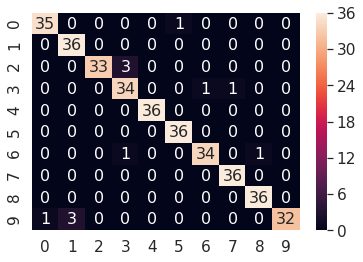

In [200]:
%matplotlib inline

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
       
cf_cv = np.zeros((10,10))  
for i in range(len(y_cv)):
    cf_cv[y_cv[i]][y_cv_pred[i]] += 1
        
df_cm = pd.DataFrame(cf_cv, range(10), range(10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()

#### Confusion Matrix for Test set

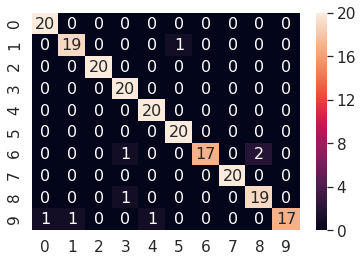

In [201]:
%matplotlib inline

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
       
cf_test = np.zeros((10,10))  
for i in range(len(y_test)):
    cf_test[y_test[i]][y_test_pred[i]] += 1
        
df_cm = pd.DataFrame(cf_test, range(10), range(10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()

### Βήμα 14
Το Long Short-Term Memory (LSTM) ειναι μια τροποποιημένη έκδοση ενός RNN, η οποία καθιστά πιο εύκολο το να θυμάται προηγούμενα data στην μνήμη. Το vanishing gradient problem του RNN πλέον επιλύεται με το LSTM. Το LSTM ειναί πολύ βολικό στο να κατηγοριοποιεί και να προβλέπει σειρές γεγονότων στον χρόνο δοσμένων time lags άγνωστης διάρκειας χρησιμοποιώντας backpropagation στο training του learning.  Αποτελείται από τρεις gates:   
- input gate - βρίσκει ποια τιμή από την είσοδο θα πρέπει να χρησιμοποιηθεί για να τροποποιήσει τη μνήμη. Η sigmoid function αποφασίζει ποιες τιμές πρέπει να μεταφερθούν στο 0,1. και η συνάρτηση tanh δίνει βάρη στις τιμές που περνούν αποφασίζοντας το επίπεδο της σπουδαιότητάς τους, που κυμαίνεται από -1 έως 1.  
- forget gate - βρίσκει τι πρέπει να απορριφθεί από το μπλοκ. Αποφασίζεται από τη sigmoid function. Εξετάζει την προηγούμενη κατάσταση (ht-1) και το content input (Xt) και εξάγει έναν αριθμό μεταξύ 0 και 1 για κάθε αριθμό στο cell state Ct-1.  
- output gate - η είσοδος και η μνήμη του μπλοκ χρησιμοποιούνται για να αποφασίσουν την έξοδο. Η  sigmoid function αποφασίζει ποιες τιμές πρέπει να μεταφερθούν στο 0,1 και η συνάρτηση tanh δίνει βάρη στις τιμές που περνούν αποφασίζοντας το επίπεδο της σπουδαιότητάς τους που κυμαίνεται από -1 έως 1 και πολλαπλασιάζεται με την έξοδο της sigmoid function.

#### ερωτήματα 1, 2, 3, 4
Το μοντέλο μας είναι ένα lstm πολλών πιθανά επιπέδων (fc προς την έξοδο) που υποστηρίζει μια ή δύο ταυτόχρονες κατευθύνσεις ανάδρασης. Έχει  cross entropy loss μιας και πρόκειται για πρόβλημα ταξινόμησης και βελτιστοποιητή adam για γρήγορη και σωστή σύγκλιση.

In [202]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import pickle
from joblib import dump, load

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class FrameLevelDataset(Dataset):
    def __init__(self, data):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        self.maxseqlen=153
        self.feats, self.labels, self.lengths = self.zero_pad_and_stack(data)
        
        #if isinstance(labels, (list, tuple)):
        #    self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded = []
        labels = np.array([])

        
        lengths = []
        for i in range(len(x)):
            for j in range(len(x[i])):
                lengths.append(len(x[i][j]))
        lengths = np.array(lengths) 
#         self.maxseqlen = np.max(lengths) found=153
                
        for i in range(len(x)):
            labels = np.concatenate((labels, i*np.ones(len(x[i]))),axis=0)
            for j in range(len(x[i])):
                #zero padding
                padded.append( 
                    np.concatenate((x[i][j].copy(), np.zeros((self.maxseqlen-len(x[i][j]),6)) ), axis=0) )

        padded = np.array(padded)

        return padded, labels, lengths

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(self.feature_size, output_dim)  

        
    def forward(self, x, lengths):
        x = x.float()
        # Set initial states
        bi = 2 if self.bidirectional else 1
        h0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device) 
        c0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device)
        
        # Forward propagate LSTM
#         print("x.shape=",x.shape)
#         print("h0.shape=",h0.shape)
        outputs, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, feature_size)
        
        # Decode the hidden state of the last time step
        outputs = self.fc(outputs[:, :, :])
        last_outputs = self.last_timestep(outputs, lengths, bidirectional=self.bidirectional)
        
        
        return last_outputs   
      

       

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()






#-------------------------------------------------------------------------------------------------------#






# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters

maxseqlen = 153
input_size = 6
rnn_size = 50 #128
num_layers = 2
num_classes = 10
batch_size = 20
num_epochs = 30
learning_rate = 0.001
bidirectional = False



train_set = FrameLevelDataset(digits_train_3d)
test_set = FrameLevelDataset(digits_cv_3d)
maxseqlen = max(train_set.maxseqlen,test_set.maxseqlen)
# print('maxseqlen = ',maxseqlen)


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_train_3d),
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_cv_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)

model = BasicLSTM(input_size, rnn_size, num_classes, num_layers, bidirectional=bidirectional).to(device)
model = model.float()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (feats, labels, lengths) in enumerate(train_loader):
        feats_reshape = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        
        # Forward pass
        outputs = model(feats_reshape, lengths)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 4 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Validation Accuracy = {} %'.format(100 * correct / total)) 

# Save the model checkpoint

dump(model, './model4.joblib')
# torch.save(model.state_dict(), 'model.ckpt')


/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:178: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [1/30], Step [1/72], Loss: 2.2885
Epoch [1/30], Step [5/72], Loss: 2.2849
Epoch [1/30], Step [9/72], Loss: 2.2942
Epoch [1/30], Step [13/72], Loss: 2.2975
Epoch [1/30], Step [17/72], Loss: 2.2376
Epoch [1/30], Step [21/72], Loss: 2.2841
Epoch [1/30], Step [25/72], Loss: 2.2299
Epoch [1/30], Step [29/72], Loss: 2.2141
Epoch [1/30], Step [33/72], Loss: 2.1464
Epoch [1/30], Step [37/72], Loss: 2.1594
Epoch [1/30], Step [41/72], Loss: 2.1807
Epoch [1/30], Step [45/72], Loss: 2.0275
Epoch [1/30], Step [49/72], Loss: 1.8928
Epoch [1/30], Step [53/72], Loss: 1.7869
Epoch [1/30], Step [57/72], Loss: 1.9889
Epoch [1/30], Step [61/72], Loss: 1.6854
Epoch [1/30], Step [65/72], Loss: 1.6800
Epoch [1/30], Step [69/72], Loss: 1.4520
Epoch [2/30], Step [1/72], Loss: 1.5386
Epoch [2/30], Step [5/72], Loss: 1.5319
Epoch [2/30], Step [9/72], Loss: 1.4570
Epoch [2/30], Step [13/72], Loss: 1.5368
Epoch [2/30], Step [17/72], Loss: 1.2546
Epoch [2/30], Step [21/72], Loss: 1.3490
Epoch [2/30], Step [25

Epoch [12/30], Step [9/72], Loss: 0.0920
Epoch [12/30], Step [13/72], Loss: 0.1120
Epoch [12/30], Step [17/72], Loss: 0.1218
Epoch [12/30], Step [21/72], Loss: 0.0415
Epoch [12/30], Step [25/72], Loss: 0.0224
Epoch [12/30], Step [29/72], Loss: 0.0402
Epoch [12/30], Step [33/72], Loss: 0.0408
Epoch [12/30], Step [37/72], Loss: 0.0444
Epoch [12/30], Step [41/72], Loss: 0.0682
Epoch [12/30], Step [45/72], Loss: 0.0212
Epoch [12/30], Step [49/72], Loss: 0.0196
Epoch [12/30], Step [53/72], Loss: 0.0383
Epoch [12/30], Step [57/72], Loss: 0.3936
Epoch [12/30], Step [61/72], Loss: 0.1361
Epoch [12/30], Step [65/72], Loss: 0.1798
Epoch [12/30], Step [69/72], Loss: 0.0923
Epoch [13/30], Step [1/72], Loss: 0.1164
Epoch [13/30], Step [5/72], Loss: 0.1177
Epoch [13/30], Step [9/72], Loss: 0.0357
Epoch [13/30], Step [13/72], Loss: 0.1970
Epoch [13/30], Step [17/72], Loss: 0.2015
Epoch [13/30], Step [21/72], Loss: 0.2963
Epoch [13/30], Step [25/72], Loss: 0.0374
Epoch [13/30], Step [29/72], Loss: 0.1

Epoch [23/30], Step [1/72], Loss: 0.0167
Epoch [23/30], Step [5/72], Loss: 0.0126
Epoch [23/30], Step [9/72], Loss: 0.0168
Epoch [23/30], Step [13/72], Loss: 0.0051
Epoch [23/30], Step [17/72], Loss: 0.0058
Epoch [23/30], Step [21/72], Loss: 0.0095
Epoch [23/30], Step [25/72], Loss: 0.0402
Epoch [23/30], Step [29/72], Loss: 0.0176
Epoch [23/30], Step [33/72], Loss: 0.0052
Epoch [23/30], Step [37/72], Loss: 0.0146
Epoch [23/30], Step [41/72], Loss: 0.0166
Epoch [23/30], Step [45/72], Loss: 0.0060
Epoch [23/30], Step [49/72], Loss: 0.0072
Epoch [23/30], Step [53/72], Loss: 0.0062
Epoch [23/30], Step [57/72], Loss: 0.0065
Epoch [23/30], Step [61/72], Loss: 0.0088
Epoch [23/30], Step [65/72], Loss: 0.0155
Epoch [23/30], Step [69/72], Loss: 0.0085
Epoch [24/30], Step [1/72], Loss: 0.0039
Epoch [24/30], Step [5/72], Loss: 0.0094
Epoch [24/30], Step [9/72], Loss: 0.0035
Epoch [24/30], Step [13/72], Loss: 0.0104
Epoch [24/30], Step [17/72], Loss: 0.0059
Epoch [24/30], Step [21/72], Loss: 0.008

/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:201: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Validation Accuracy = 97.5 %


['./model4.joblib']

In [203]:
with torch.no_grad():
    correct = 0
    total = 0
    for feats, labels, lengths in train_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Train Accuracy = {} %'.format(100 * correct / total)) 


/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Train Accuracy = 99.65277777777777 %


#### ερώτημα 5
Θα εφαρμόσουμε τεχνικές κανονικοποίησης (L2 και dropout). Η L2 κονικοποίηση εισαγάγει στην εκπαίδευση ένα κόστος ανάλογο της l2 νόρμας των ακμών. Έτσι ενθαρρύνει τη δημιουργία όσο το δυνατόν απλούστερων δικτύων που λύνουν το πρόβλημα. Τα δίκτυα αυτά είναι πιο πιθανόν να έχουν βρει πιο γενικά μοτίβα κι όχι ευκαιριακές εξαρτήσεις δεδομένων εκπαίδευεσης κι έτσι πετυχαίνουν καλύτερη γενίκευση. Το dropout αδρανοποιεί σε κάθε επανάληψη ένα ποσοστό των κόμβων (και των προσκείμενων σε αυτούς ακμών) και αφήνει τους εναπομείναντες να προσπαθήσουν να κάνουν την πρόβλεψη και να εκπαιδευθούν. Προσπαθεί να αντιμετωπίσει περιπτώσεις όπου κόμβοι συνεργάζονται για ναδιορθώσουν λάθη από προηγούμενα επίπεδα προδίδιντας έτσι ευρωστία στο δίκτυο. Από την άλλη, προσομοιάζοντας μια αραιή ενεργοποίηση από ένα δεδομένο επίπεδο οδηγεί το δίκτυο να 
να μάθει αραιές αναπαραστάσεις σε autoencoder μοντέλα κι έτσι επιτελεί ρόλο regularization






In [204]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import pickle
from joblib import dump, load

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class FrameLevelDataset(Dataset):
    def __init__(self, data):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        self.maxseqlen=153
        self.feats, self.labels, self.lengths = self.zero_pad_and_stack(data)
        
        #if isinstance(labels, (list, tuple)):
        #    self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded = []
        labels = np.array([])

        
        lengths = []
        for i in range(len(x)):
            for j in range(len(x[i])):
                lengths.append(len(x[i][j]))
        lengths = np.array(lengths) 

#         self.maxseqlen = np.max(lengths) found=153
                
        for i in range(len(x)):
            labels = np.concatenate((labels, i*np.ones(len(x[i]))),axis=0)
            for j in range(len(x[i])):
                #zero padding
                padded.append( 
                    np.concatenate((x[i][j].copy(), np.zeros((self.maxseqlen-len(x[i][j]),6)) ), axis=0) )

        padded = np.array(padded)

        return padded, labels, lengths

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    nn.Dropout(0.25)
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(self.feature_size, output_dim)  

        
    def forward(self, x, lengths):
        x = x.float()
        # Set initial states
        bi = 2 if self.bidirectional else 1
        h0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device) 
        c0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device)
        
        # Forward propagate LSTM
#         print("x.shape=",x.shape)
#         print("h0.shape=",h0.shape)
        outputs, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, feature_size)
        
        # Decode the hidden state of the last time step
        outputs = self.fc(outputs[:, :, :])
        last_outputs = self.last_timestep(outputs, lengths, bidirectional=self.bidirectional)
        

        
        return last_outputs   
      

       

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()






#-------------------------------------------------------------------------------------------------------#






# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters

maxseqlen = 153
input_size = 6
rnn_size = 50 #128
num_layers = 2
num_classes = 10
batch_size = 20
num_epochs = 30
learning_rate = 0.001
bidirectional = False



train_set = FrameLevelDataset(digits_train_3d)
test_set = FrameLevelDataset(digits_cv_3d)
maxseqlen = max(train_set.maxseqlen,test_set.maxseqlen)
# print('maxseqlen = ',maxseqlen)


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_train_3d),
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_cv_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)

model = BasicLSTM(input_size, rnn_size, num_classes, num_layers, bidirectional=bidirectional).to(device)
model = model.float()
model = model

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (feats, labels, lengths) in enumerate(train_loader):
        feats_reshape = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        
        # Forward pass
        outputs = model(feats_reshape, lengths)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 4 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Validation Accuracy = {} %'.format(100 * correct / total)) 

# Save the model checkpoint

dump(model, './model5.joblib')
# torch.save(model.state_dict(), 'model.ckpt')


/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:182: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [1/30], Step [1/72], Loss: 2.2993
Epoch [1/30], Step [5/72], Loss: 2.2807
Epoch [1/30], Step [9/72], Loss: 2.3034
Epoch [1/30], Step [13/72], Loss: 2.2772
Epoch [1/30], Step [17/72], Loss: 2.2569
Epoch [1/30], Step [21/72], Loss: 2.2943
Epoch [1/30], Step [25/72], Loss: 2.2875
Epoch [1/30], Step [29/72], Loss: 2.2737
Epoch [1/30], Step [33/72], Loss: 2.2075
Epoch [1/30], Step [37/72], Loss: 2.1492
Epoch [1/30], Step [41/72], Loss: 2.0335
Epoch [1/30], Step [45/72], Loss: 2.0041
Epoch [1/30], Step [49/72], Loss: 1.8768
Epoch [1/30], Step [53/72], Loss: 1.9197
Epoch [1/30], Step [57/72], Loss: 1.8297
Epoch [1/30], Step [61/72], Loss: 1.8712
Epoch [1/30], Step [65/72], Loss: 1.7636
Epoch [1/30], Step [69/72], Loss: 1.6155
Epoch [2/30], Step [1/72], Loss: 1.4185
Epoch [2/30], Step [5/72], Loss: 1.8194
Epoch [2/30], Step [9/72], Loss: 1.4680
Epoch [2/30], Step [13/72], Loss: 1.4108
Epoch [2/30], Step [17/72], Loss: 1.3715
Epoch [2/30], Step [21/72], Loss: 1.3589
Epoch [2/30], Step [25

Epoch [12/30], Step [9/72], Loss: 0.0542
Epoch [12/30], Step [13/72], Loss: 0.0142
Epoch [12/30], Step [17/72], Loss: 0.3131
Epoch [12/30], Step [21/72], Loss: 0.1962
Epoch [12/30], Step [25/72], Loss: 0.1162
Epoch [12/30], Step [29/72], Loss: 0.1239
Epoch [12/30], Step [33/72], Loss: 0.0603
Epoch [12/30], Step [37/72], Loss: 0.0542
Epoch [12/30], Step [41/72], Loss: 0.0733
Epoch [12/30], Step [45/72], Loss: 0.0196
Epoch [12/30], Step [49/72], Loss: 0.0415
Epoch [12/30], Step [53/72], Loss: 0.0124
Epoch [12/30], Step [57/72], Loss: 0.0371
Epoch [12/30], Step [61/72], Loss: 0.0348
Epoch [12/30], Step [65/72], Loss: 0.0325
Epoch [12/30], Step [69/72], Loss: 0.0259
Epoch [13/30], Step [1/72], Loss: 0.0170
Epoch [13/30], Step [5/72], Loss: 0.1463
Epoch [13/30], Step [9/72], Loss: 0.0966
Epoch [13/30], Step [13/72], Loss: 0.0340
Epoch [13/30], Step [17/72], Loss: 0.0848
Epoch [13/30], Step [21/72], Loss: 0.0159
Epoch [13/30], Step [25/72], Loss: 0.0238
Epoch [13/30], Step [29/72], Loss: 0.1

Epoch [23/30], Step [1/72], Loss: 0.0234
Epoch [23/30], Step [5/72], Loss: 0.0187
Epoch [23/30], Step [9/72], Loss: 0.0149
Epoch [23/30], Step [13/72], Loss: 0.0134
Epoch [23/30], Step [17/72], Loss: 0.0115
Epoch [23/30], Step [21/72], Loss: 0.0361
Epoch [23/30], Step [25/72], Loss: 0.0614
Epoch [23/30], Step [29/72], Loss: 0.3340
Epoch [23/30], Step [33/72], Loss: 0.0110
Epoch [23/30], Step [37/72], Loss: 0.0096
Epoch [23/30], Step [41/72], Loss: 0.0090
Epoch [23/30], Step [45/72], Loss: 0.0119
Epoch [23/30], Step [49/72], Loss: 0.0143
Epoch [23/30], Step [53/72], Loss: 0.0056
Epoch [23/30], Step [57/72], Loss: 0.0322
Epoch [23/30], Step [61/72], Loss: 0.0534
Epoch [23/30], Step [65/72], Loss: 0.0473
Epoch [23/30], Step [69/72], Loss: 0.0079
Epoch [24/30], Step [1/72], Loss: 0.0054
Epoch [24/30], Step [5/72], Loss: 0.0182
Epoch [24/30], Step [9/72], Loss: 0.0197
Epoch [24/30], Step [13/72], Loss: 0.0158
Epoch [24/30], Step [17/72], Loss: 0.0142
Epoch [24/30], Step [21/72], Loss: 0.058

/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:205: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Validation Accuracy = 97.22222222222223 %


['./model5.joblib']

#### Ερωτήματα 6, 7

Αξιοποιούμε τις παραπάνω τεχνικές για regularization και επιπλέον κάνουμε το δίκτυο bidirectional και εκτελούμε early stopping. Το τελευταίο στοχεύει στην επίλυση του trade-off μεταξύ πολλών εποχών και overfitting και λίγων με underfitting. Θέτει ένα όριο επαναλήψεων στις οποίες υπάρχει ανοχή να μην βελτιώνεται το loss και όταν αυτό ξεπεραστεί σταματά η εκπαίδευση. Με το να κάνουμε διπλή την κατεύθυνση του δικτύου μπορούμε να πιάσουμε εξαρτήσεις των δεδομένων οι οποίες υπάρχουν στην αντίθετη κατεύθυνση και δε θα τις βρίσκαμε αποθηκεύοντας μόνο πληροροφορία για προηγούμενα κομμάτια της εισόδου. Και από τη στιγμή που 'μελλοντικά δείγματα' της ακολουθίας μας είναι διαθέσιμα σε κάθε βήμα (η ακολουθία είναι γνωστή σε όλες της τις στιγμές) δεν έχουμε λόγο να μην το αξιοποιήσουμε σαν επιπλέον πληροφορία για το output. Επίσης αξιοποιούμε την βιβλιοθήκη pickle για να σώσουμε την κατάσταση του βέλτιστου μοντέλου σε αρχείο για μελλοντική χρήση αλλά και για back up του workspace.

In [229]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import pickle
from joblib import dump, load

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


class FrameLevelDataset(Dataset):
    def __init__(self, data):
        """
            feats: Python list of numpy arrays that contain the sequence features.
                   Each element of this list is a numpy array of shape seq_length x feature_dimension
            labels: Python list that contains the label for each sequence (each label must be an integer)
        """
        self.maxseqlen=153
        self.feats, self.labels, self.lengths = self.zero_pad_and_stack(data)
        
        #if isinstance(labels, (list, tuple)):
        #    self.labels = np.array(labels).astype('int64')

    def zero_pad_and_stack(self, x):
        """
            This function performs zero padding on a list of features and forms them into a numpy 3D array
            returns
                padded: a 3D numpy array of shape num_sequences x max_sequence_length x feature_dimension
        """
        padded = []
        labels = np.array([])

        
        lengths = []
        for i in range(len(x)):
            for j in range(len(x[i])):
                lengths.append(len(x[i][j]))
        lengths = np.array(lengths) 

#         self.maxseqlen = np.max(lengths) found=153
                
        for i in range(len(x)):
            labels = np.concatenate((labels, i*np.ones(len(x[i]))),axis=0)
            for j in range(len(x[i])):
                #zero padding
                padded.append( 
                    np.concatenate((x[i][j].copy(), np.zeros((self.maxseqlen-len(x[i][j]),6)) ), axis=0) )

        padded = np.array(padded)

        return padded, labels, lengths

    def __getitem__(self, item):
        return self.feats[item], self.labels[item], self.lengths[item]

    def __len__(self):
        return len(self.feats)


class BasicLSTM(nn.Module):
    nn.Dropout(0.25)
    def __init__(self, input_dim, rnn_size, output_dim, num_layers, bidirectional=False):
        super(BasicLSTM, self).__init__()
        self.bidirectional = bidirectional
        self.feature_size = rnn_size * 2 if self.bidirectional else rnn_size
        self.rnn_size = rnn_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, rnn_size, num_layers, batch_first=True, bidirectional=bidirectional)
        self.fc = nn.Linear(self.feature_size, output_dim)  

        
    def forward(self, x, lengths):
        x = x.float()
        # Set initial states
        bi = 2 if self.bidirectional else 1
        h0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device) 
        c0 = torch.zeros(self.num_layers*bi, x.size(0), self.rnn_size).to(device)
        
        # Forward propagate LSTM
#         print("x.shape=",x.shape)
#         print("h0.shape=",h0.shape)
        outputs, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, feature_size)
        
        # Decode the hidden state of the last time step
        outputs = self.fc(outputs[:, :, :])
        last_outputs = self.last_timestep(outputs, lengths, bidirectional=self.bidirectional)
        
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
#         return out
        
        return last_outputs   
        """ 
            x : 3D numpy array of dimension N x L x D
                N: batch index
                L: sequence index
                D: feature index

            lengths: N x 1
         """
        
        # --------------- Insert your code here ---------------- #
        
        # You must have all of the outputs of the LSTM, but you need only the last one (that does not exceed the sequence length)
        # To get it use the last_timestep method
        # Then pass it through the remaining network

       

    def last_timestep(self, outputs, lengths, bidirectional=False):
        """
            Returns the last output of the LSTM taking into account the zero padding
        """
        if bidirectional:
            forward, backward = self.split_directions(outputs)
            last_forward = self.last_by_index(forward, lengths)
            last_backward = backward[:, 0, :]
            # Concatenate and return - maybe add more functionalities like average
            return torch.cat((last_forward, last_backward), dim=-1)

        else:
            return self.last_by_index(outputs, lengths)

    @staticmethod
    def split_directions(outputs):
        direction_size = int(outputs.size(-1) / 2)
        forward = outputs[:, :, :direction_size]
        backward = outputs[:, :, direction_size:]
        return forward, backward

    @staticmethod
    def last_by_index(outputs, lengths):
        # Index of the last output for each sequence.
        idx = (lengths - 1).view(-1, 1).expand(outputs.size(0),
                                               outputs.size(2)).unsqueeze(1)
        return outputs.gather(1, idx).squeeze()






#-------------------------------------------------------------------------------------------------------#






# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters

maxseqlen = 153
input_size = 6
rnn_size = 100 #128
num_layers = 2
num_classes = 10
batch_size = 20
num_epochs = 50
learning_rate = 0.001
bidirectional = True



train_set = FrameLevelDataset(digits_train_3d)
test_set = FrameLevelDataset(digits_cv_3d)
maxseqlen = max(train_set.maxseqlen,test_set.maxseqlen)
# print('maxseqlen = ',maxseqlen)


# Data loader
train_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_train_3d),
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_cv_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)

model = BasicLSTM(input_size, rnn_size, num_classes, num_layers, bidirectional=bidirectional).to(device)
model = model.float()
model = model

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    
# Train the model
train_loss=[]
val_loss=[]
min_val_loss = np.Inf
n_epochs_stop = 20
epochs_no_improve = 0
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss.append([])
    val_loss.append([])
    early_stop = False
    
    for i, (feats, labels, lengths) in enumerate(test_loader):
        feats_reshape = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        
        # Forward pass
        outputs = model(feats_reshape, lengths)
        loss = criterion(outputs, labels)
        
        val_loss[epoch].append(loss.item())
    
    
    
    v_loss = 0
    for i, (feats, labels, lengths) in enumerate(train_loader):
        feats_reshape = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device) 
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        
        # Forward pass
        outputs = model(feats_reshape, lengths)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i) % 4 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        train_loss[epoch].append(loss.item())
        
        v_loss += loss
        v_loss = v_loss / len(train_loader)
        # If the validation loss is at a minimum
        if v_loss < min_val_loss:
  
             #torch.save(model)
             epochs_no_improve = 0
             min_val_loss = v_loss
  
        else:
            epochs_no_improve += 1
        # Check early stopping condition           
        if epochs_no_improve == n_epochs_stop:
            print('Early stopping!' )
            early_stop = True
            break
        else:
            continue
        break
    if early_stop:
        print("Stopped")
        break
        
        






/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:206: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:221: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Epoch [1/50], Step [1/72], Loss: 2.3022
Epoch [1/50], Step [5/72], Loss: 2.2828
Epoch [1/50], Step [9/72], Loss: 2.2606
Epoch [1/50], Step [13/72], Loss: 2.2305
Epoch [1/50], Step [17/72], Loss: 2.1281
Epoch [1/50], Step [21/72], Loss: 2.0840
Epoch [1/50], Step [25/72], Loss: 1.7623
Epoch [1/50], Step [29/72], Loss: 1.6955
Epoch [1/50], Step [33/72], Loss: 1.5297
Epoch [1/50], Step [37/72], Loss: 1.4699
Epoch [1/50], Step [41/72], Loss: 1.2978
Epoch [1/50], Step [45/72], Loss: 1.0243
Epoch [1/50], Step [49/72], Loss: 1.0452
Epoch [1/50], Step [53/72], Loss: 0.8116
Epoch [1/50], Step [57/72], Loss: 0.7619
Epoch [1/50], Step [61/72], Loss: 0.7214
Epoch [1/50], Step [65/72], Loss: 0.7215
Epoch [1/50], Step [69/72], Loss: 0.6603
Epoch [2/50], Step [1/72], Loss: 0.7004
Epoch [2/50], Step [5/72], Loss: 0.6152
Epoch [2/50], Step [9/72], Loss: 0.5843
Epoch [2/50], Step [13/72], Loss: 0.6099
Epoch [2/50], Step [17/72], Loss: 0.4887
Epoch [2/50], Step [21/72], Loss: 0.5314
Epoch [2/50], Step [25

Epoch [12/50], Step [9/72], Loss: 0.0448
Epoch [12/50], Step [13/72], Loss: 0.0922
Epoch [12/50], Step [17/72], Loss: 0.0063
Epoch [12/50], Step [21/72], Loss: 0.0067
Epoch [12/50], Step [25/72], Loss: 0.0193
Epoch [12/50], Step [29/72], Loss: 0.0079
Epoch [12/50], Step [33/72], Loss: 0.0187
Epoch [12/50], Step [37/72], Loss: 0.0033
Epoch [12/50], Step [41/72], Loss: 0.0826
Epoch [12/50], Step [45/72], Loss: 0.0655
Epoch [12/50], Step [49/72], Loss: 0.0073
Epoch [12/50], Step [53/72], Loss: 0.0174
Epoch [12/50], Step [57/72], Loss: 0.0137
Epoch [12/50], Step [61/72], Loss: 0.1549
Epoch [12/50], Step [65/72], Loss: 0.0047
Epoch [12/50], Step [69/72], Loss: 0.0074
Epoch [13/50], Step [1/72], Loss: 0.0211
Epoch [13/50], Step [5/72], Loss: 0.0080
Epoch [13/50], Step [9/72], Loss: 0.0601
Epoch [13/50], Step [13/72], Loss: 0.0144
Epoch [13/50], Step [17/72], Loss: 0.1209
Epoch [13/50], Step [21/72], Loss: 0.0254
Epoch [13/50], Step [25/72], Loss: 0.0046
Epoch [13/50], Step [29/72], Loss: 0.0

TypeError: only integer scalar arrays can be converted to a scalar index

/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


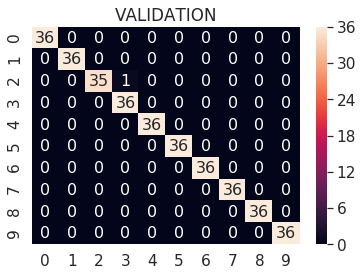

/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


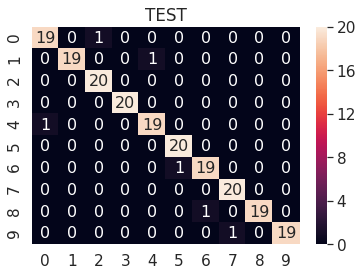

In [288]:
%matplotlib inline

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Validate the model

    
test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_cv_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)
y_pred=np.array([])
y_true=np.array([])
with torch.no_grad():
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.int8, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        y_true=np.concatenate((y_true,labels.numpy()),axis=0)
        y_pred=np.concatenate((y_pred,predicted.numpy()),axis=0)
    

cf_cv = np.zeros((10,10))  
for i in range(len(y_true)):
    cf_cv[int(y_true[i])][int(y_pred[i])] += 1
        
df_cm = pd.DataFrame(cf_cv, range(10), range(10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title('VALIDATION')
plt.show()



# Test the model

    
test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_test_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)
y_pred=np.array([])
y_true=np.array([])
with torch.no_grad():
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.int8, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        y_true=np.concatenate((y_true,labels.numpy()),axis=0)
        y_pred=np.concatenate((y_pred,predicted.numpy()),axis=0)
    

cf_cv = np.zeros((10,10))  
for i in range(len(y_true)):
    cf_cv[int(y_true[i])][int(y_pred[i])] += 1
        
df_cm = pd.DataFrame(cf_cv, range(10), range(10))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title('TEST')
plt.show()




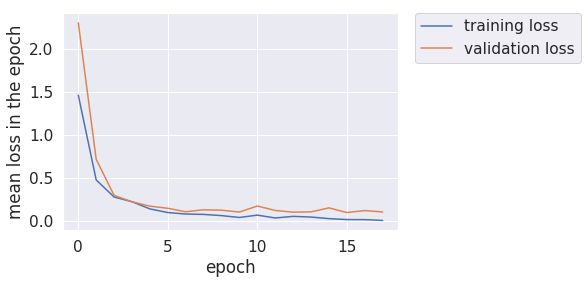

In [273]:
train_loss_arr=np.array(train_loss)
val_loss_arr=np.array(val_loss)

tl=[]
vl=[]
for elem in train_loss_arr:
    elem=np.mean(np.array(elem))
    tl.append(elem)
for elem in val_loss_arr:
    elem=np.mean(np.array(elem))
    vl.append(elem)
    
tl=np.array(tl)
vl=np.array(vl)


plt.figure

plt.plot(tl, label="training loss")
plt.plot(vl, label="validation loss")
plt.xlabel('epoch')
plt.ylabel('mean loss in the epoch')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
     

Παραπάνω βλέπουμε το διάγραμμα που δείχνει την εξέλιξη του loss για τα δείγματα εκπαίδευσης και επκύρωσης καθώς προχωράνε οι εποχές. Αρχικά το μοντέλο δεν είναι εκπαιδευμένο και τυχαίνει η μέση απώλεια στα batches εκπαίδευσης να είναι μεγαλύτερη από αυτή στα validation εντός ενός epoch. Αυτό γίνεται στα 3 πρώτα epochs. Στη συνέχεια το δίκτυο έχει αρχίσει να εκπαιδεύεται και να κάνει fit πάνω στο train set, οπότε το train loss είναι πιο χαμηλά. Παρατηρούμε ακόμη ότι το loss πέφτει με μεγαλύτερο ρυθμό στην αρχή στης εκπαίδευσης και στην συνέχεια επέρχεται κάποιου είδους κορεσμός. Κάποιες φορές έχουμε και αυξομειώσεις του μέσου loss εποχής από εποχή σε εποχή. Το early stopping που υλοποιήσαμε όμως έχει μια ανοχή σε αυτά και δεν σταματά την εκπαίδευση. Όταν πραγματικά σταματήσει να βελτιώνεται το loss, το early stopping ενεργοποιείται και σταματά την εκπαίδευση.

In [245]:
# Validate the model

    
test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_cv_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)

with torch.no_grad():
    correct = 0
    total = 0
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Validation Accuracy = {} %'.format(100 * correct / total)) 

    
    



test_loader = torch.utils.data.DataLoader(dataset=FrameLevelDataset(digits_test_3d),
                                          batch_size=batch_size, 
                                          shuffle=False)
# Test the model

with torch.no_grad():
    correct = 0
    total = 0
    for feats, labels, lengths in test_loader:
        feats = feats.reshape(-1, maxseqlen, input_size).to(device)
        labels = labels.to(device)
        labels = torch.tensor(labels, dtype=torch.long, device=device)
        lengths = lengths.to(device)
        outputs = model(feats, lengths).double()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy = {} %'.format(100 * correct / total)) 
    


# Save the model checkpoint

dump(model, './model7.joblib')
# torch.save(model.state_dict(), 'model.ckpt')

/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Validation Accuracy = 99.72222222222223 %


/home/bill/.local/lib/python3.5/site-packages/ipykernel_launcher.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Test Accuracy = 97.0 %


['./model7.joblib']

Με συνδυαστική εφαρμογή των τεχνικών κανονικοποίησης, early stopping και bidirectional εκπαιδεύσαμε ένα  lstm δίκτυο 2 επιπέδων σχετικά μεγαλύτερο από αυτά που δοκιμάσαμε προηγουμένως και πετύχαμε γρήγορα σύγκλιση (σε 18 εποχές από τις 50 που υποθέσαμε) και πολύ καλά αποτελέσματα στο validation και το test set.